In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [2]:
df=pd.read_csv('data.csv')
df
A=df
A=A.drop(columns=['vital.status'])
A
ak=A
df


,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.043330,-0.002598,0.449228,-0.375230,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,-0.220764,0.220809,1.035115,-0.074136,0.279067,0.292925,-0.155242,-0.089365,0.267530,0
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.010615,-0.133214,0.344969,-0.351936,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,0.064070,-0.384008,0.678042,0.096329,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.065488,0.209858,0.920408,0.042210,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.000000,5.004281,12.817877,10.854036,11.293350,4.143573,0.926986,5.818401,12.950524,12.552395,...,-0.306897,-0.103128,0.326742,-2.627649,-0.993249,0.131803,-0.012965,0.306601,0.344012,0
701,2.241901,4.867086,8.875779,5.641164,11.940968,3.149715,4.101322,9.272752,5.335362,6.974459,...,0.271274,-0.144137,0.293718,-0.683490,-0.502791,-0.674763,0.165243,-0.338279,0.487583,1
702,3.260718,6.700652,14.299072,8.443970,12.312343,11.846810,2.148544,10.435503,3.498442,8.011837,...,-0.062952,0.030552,-0.771497,0.217850,0.669064,0.110822,-0.170345,-0.232004,-0.165477,1
703,11.766777,6.656791,13.638154,10.618453,13.775750,6.649667,7.340151,9.903519,9.922855,9.360980,...,-0.185525,0.651704,-0.136779,-0.126707,0.053346,-0.455617,-0.219365,-0.103807,-0.109356,0


In [3]:
df1=A
# Assuming df is your DataFrame
mean = df1.mean()
std = df1.std()
# Standardize the data using broadcasting
mean= ( df1- mean) / std
#center the data
centred_data=df1-mean
centred_data
# compute the covariance matrix
cov_matrix=centred_data.cov()
cov_matrix
#egienvalue decompostion
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
print('\n eigenvalue=\n',eigenvalue)
print('\neignvectors=\n',eignvectors)
# sort Eignvectors
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
eigen_pairs
# Step 5: Select Principal Components (choose the top k)
k = 968 # Example: Choosing the top 2 principal components
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
selected_eigenvectors.shape
#step 6:transform data
#read the concept of transform in detalis
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
transformed_data
df1=pd.DataFrame(transformed_data)
df1
df1=np.real(df1)
df1=pd.DataFrame(df1)
df1


 eigenvalue=
 [ 4.09612269e+02+0.j  3.21117910e+02+0.j  1.26551150e+02+0.j ...
 -4.78019400e-32+0.j -1.00191091e-32+0.j  5.99841684e-18+0.j]

eignvectors=
 [[ 3.65719809e-02+0.j -6.27737199e-02+0.j -8.82713750e-02+0.j ...
   2.03386103e-17+0.j -3.23789980e-17+0.j  4.11440801e-05+0.j]
 [ 1.70523784e-02+0.j -1.06347894e-01+0.j  1.80784886e-02+0.j ...
   4.04247729e-17+0.j -4.50518854e-17+0.j  5.80559599e-05+0.j]
 [-2.21144336e-02+0.j -1.10376334e-01+0.j -1.42055809e-01+0.j ...
   2.81277040e-16+0.j -3.05348387e-16+0.j  1.01981414e-04+0.j]
 ...
 [ 2.56832733e-03+0.j  1.61782198e-03+0.j -5.69706454e-03+0.j ...
   5.97982205e-14+0.j -6.05271874e-14+0.j  7.84119135e-03+0.j]
 [ 1.07731681e-03+0.j -1.57529970e-03+0.j  6.41845736e-03+0.j ...
   5.41309849e-15+0.j  2.98564885e-18+0.j  6.02973190e-03+0.j]
 [ 4.27642434e-03+0.j  1.90746776e-04+0.j -1.45947186e-03+0.j ...
   1.86646996e-14+0.j -1.91526185e-14+0.j -7.99953949e-03+0.j]]


,0,1,2,3,4,5,6,7,8,9,...,958,959,960,961,962,963,964,965,966,967
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,0.834014,0.095008,0.252994,0.55889,0.55889,-0.507286,0.111591,0.111591,-0.727604,-0.727604
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,0.834014,0.095008,0.252994,0.55889,0.55889,-0.507286,0.111591,0.111591,-0.727604,-0.727604
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,0.834014,0.095008,0.252994,0.55889,0.55889,-0.507286,0.111591,0.111591,-0.727604,-0.727604
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,0.834014,0.095008,0.252994,0.55889,0.55889,-0.507286,0.111591,0.111591,-0.727604,-0.727604
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,0.834014,0.095008,0.252994,0.55889,0.55889,-0.507286,0.111591,0.111591,-0.727604,-0.727604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,0.834014,0.095008,0.252994,0.55889,0.55889,-0.507286,0.111591,0.111591,-0.727604,-0.727604
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,0.834014,0.095008,0.252994,0.55889,0.55889,-0.507286,0.111591,0.111591,-0.727604,-0.727604
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,0.834014,0.095008,0.252994,0.55889,0.55889,-0.507286,0.111591,0.111591,-0.727604,-0.727604
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,0.834014,0.095008,0.252994,0.55889,0.55889,-0.507286,0.111591,0.111591,-0.727604,-0.727604


In [6]:
df1=A
# Assuming df is your DataFrame
mean = df1.mean()
std = df1.std()
# Standardize the data using broadcasting
mean= ( df1- mean) / std
#center the data
centred_data=df1-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT157,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363
rs_CLEC3A,15.774462,3.342650,3.961705,3.432024,3.956490,1.007002,0.347253,4.179722,0.053527,-0.100151,...,0.142632,0.220184,-0.299617,-0.020485,0.229514,0.037365,-0.048603,0.010319,0.029251,0.185599
rs_CPB1,3.342650,15.013837,2.746144,2.889133,4.331131,0.434162,0.970815,2.361133,1.744823,1.752361,...,0.338335,0.436164,-0.159159,0.006402,0.312634,-0.020869,-0.105085,-0.015360,0.106313,0.057851
rs_SCGB2A2,3.961705,2.746144,14.125177,11.520727,5.658765,5.326245,1.277265,5.155902,2.461383,2.854624,...,0.299262,0.360113,-0.332386,-0.113977,0.218397,0.082297,0.229284,0.080730,-0.149345,-0.004821
rs_SCGB1D2,3.432024,2.889133,11.520727,10.552365,4.513449,3.962365,1.187310,4.036840,2.314752,2.671607,...,0.231639,0.312408,-0.279716,-0.069221,0.177462,0.062186,0.174698,0.068359,-0.105643,0.012355
rs_TFF1,3.956490,4.331131,5.658765,4.513449,10.836705,2.017464,0.863935,4.418576,1.314556,1.577052,...,0.188098,0.526298,-0.508005,-0.009305,0.310155,0.078283,-0.019607,0.042921,0.054148,0.054805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pp_p62.LCK.ligand,0.037365,-0.020869,0.082297,0.062186,0.078283,0.035766,0.034387,0.035337,0.039020,0.051747,...,-0.019447,-0.002938,0.008519,-0.009798,0.005041,0.035691,0.031183,-0.017414,0.003012,-0.021252
pp_p70S6K,-0.048603,-0.105085,0.229284,0.174698,-0.019607,0.132295,0.069471,0.121824,0.180416,0.214923,...,-0.052549,-0.010693,0.055675,-0.026238,-0.014537,0.031183,0.197503,-0.075090,0.022167,-0.081066
pp_p70S6K.pT389,0.010319,-0.015360,0.080730,0.068359,0.042921,-0.034258,0.003441,0.143863,-0.295993,-0.301053,...,0.122459,0.032063,-0.087949,0.018445,0.010603,-0.017414,-0.075090,0.387595,-0.066421,0.161374
pp_p90RSK,0.029251,0.106313,-0.149345,-0.105643,0.054148,-0.096771,-0.027533,-0.227710,0.124805,0.164316,...,-0.060095,-0.027226,0.069998,0.010660,0.001277,0.003012,0.022167,-0.066421,0.428179,0.019818


# PCA(65578) 

In [4]:
X=A
k=65578
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df1=pd.DataFrame(X)
df1

,0,1,2,3,4,5,6,7,8,9,...,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752519e-13,-4.938249e-13,1.674521e-13
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752849e-13,-4.939119e-13,1.673767e-13
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.751753e-13,-4.937895e-13,1.674182e-13
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752563e-13,-4.938024e-13,1.674316e-13
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.753399e-13,-4.938706e-13,1.673865e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752777e-13,-4.938270e-13,1.673204e-13
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752903e-13,-4.937918e-13,1.673947e-13
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.751954e-13,-4.938319e-13,1.673729e-13
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.753036e-13,-4.938340e-13,1.673642e-13


#  PCA( 2619 )

In [5]:
X=A
k=2619
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df2=pd.DataFrame(X)
df2

,0,1,2,3,4,5,6,7,8,9,...,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752519e-13,-4.938249e-13,1.674521e-13
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752849e-13,-4.939119e-13,1.673767e-13
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.751753e-13,-4.937895e-13,1.674182e-13
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752563e-13,-4.938024e-13,1.674316e-13
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.753399e-13,-4.938706e-13,1.673865e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752777e-13,-4.938270e-13,1.673204e-13
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.752903e-13,-4.937918e-13,1.673947e-13
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.751954e-13,-4.938319e-13,1.673729e-13
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,-0.090532,-0.090532,-0.011363,-0.011363,0.00471,0.086966,0.018076,4.753036e-13,-4.938340e-13,1.673642e-13


# PCA( 652 )

In [6]:
X=A
k=652
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df3=pd.DataFrame(X)
df3

,0,1,2,3,4,5,6,7,8,9,...,642,643,644,645,646,647,648,649,650,651
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,1.244522,0.476649,2.349785,0.392516,-1.270590,-0.568089,0.932611,1.710341,-0.723515,-0.753497
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,1.086408,0.607393,2.278654,-0.079266,-1.288900,-0.661443,1.131099,0.982422,-0.702838,-1.412788
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,1.981714,0.661747,2.558410,0.390215,-1.240066,-1.213851,1.019218,0.764440,-0.338328,-1.390010
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,1.748554,0.802040,2.347212,0.380808,-1.164961,-0.818638,1.131122,0.841648,-0.514883,-1.452466
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,1.651611,0.864302,2.045152,0.452855,-0.403049,-1.096766,1.155404,1.544708,-1.058495,-1.162272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,1.220676,0.501281,2.217711,0.276385,-1.342827,-0.191339,1.075859,0.875554,-0.475982,-1.438337
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,1.470026,0.477851,2.348376,0.257855,-1.235646,-0.455138,0.820606,1.119762,-0.591649,-1.893132
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,1.399521,1.029741,2.043295,0.133186,-1.184587,-0.626036,0.650254,0.865628,-0.590123,-1.187733
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,1.398438,0.949787,2.082680,0.330617,-0.997679,-0.431998,0.564530,1.500448,-0.537507,-1.834595


# PCA( 160 )

In [7]:
X=A
k=160
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df4=pd.DataFrame(X)
df4

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,0.798492,2.084584,-2.717660,1.765196,-3.427457,-2.314388,0.779239,-3.439119,-1.382675,-2.619767
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,-0.154047,-0.487184,-2.453879,1.564357,-5.023407,-2.749431,0.353249,0.624396,-3.850641,-0.893937
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,1.105386,0.567410,-3.436182,2.056105,-1.743105,-1.005626,0.944752,-3.184499,1.634071,-0.934544
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,0.019758,-2.128471,0.310773,1.605905,-1.881153,-0.402981,0.953540,-3.604273,3.815441,-1.737194
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,0.033165,0.874730,-0.801925,2.738746,-3.266980,-1.371951,0.218607,-2.268684,1.519815,-1.012426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,-0.748558,0.139833,-0.105605,3.160805,-5.154550,1.340728,-0.003658,0.207101,-4.160944,-3.140351
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,3.158602,1.223500,0.830381,0.617584,-2.051125,-0.481713,-0.602621,-2.312975,-0.294594,-2.230980
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,-2.710119,0.581359,-2.103264,0.643616,-2.095053,-4.087737,-0.700557,-5.113656,1.437599,1.936305
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,-0.939776,2.071310,0.072598,2.436500,-2.573066,-2.104166,2.736791,-3.068151,0.831110,-3.348584


# PCA(101  )

In [8]:
X=A
k=101
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df5=pd.DataFrame(X)
df5

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,-6.245643,-0.589036,0.365608,1.142985,1.159118,0.576913,2.175062,-3.782948,-1.980834,1.818676
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,-4.258066,-3.689487,1.945631,-0.344013,-1.690912,-2.839801,0.066777,-5.088376,-1.340971,2.314117
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,-1.110908,-1.359708,3.589055,2.391160,0.040176,-3.100134,3.932101,-3.675969,-5.864097,3.311671
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,-1.124398,-4.354767,0.260281,-0.538515,-0.527336,-6.874849,3.586821,-3.923552,-0.792410,0.406306
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,-1.605057,-2.089005,1.016180,-1.673314,2.996085,-2.290759,3.787404,-3.469854,-4.157510,0.344296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,-0.175198,3.329280,2.754270,1.299577,-0.403528,-0.066456,8.123977,-7.210155,-3.756974,-0.880379
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,-2.139574,2.570396,-0.174149,-1.656746,-1.198782,-3.746515,7.055802,-3.725884,-4.128394,0.866237
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,1.773056,-3.973712,1.038664,-1.414442,0.230997,-6.192762,6.932753,-2.118712,-4.073036,0.532369
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,-3.641230,1.786369,0.310709,0.300619,1.426577,0.333941,5.862353,-4.748812,-3.310664,-0.660553


# PCA( 69 )

In [9]:
X=A
k=69
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df6=pd.DataFrame(X)
df6

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,-2.096753,-3.178037,-1.702814,1.736423,2.293470,7.663722,12.056428,-5.980117,6.379540,-1.864726
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,-3.956936,-0.779212,-0.212805,0.688695,4.746432,6.122630,6.706030,-4.210095,5.029871,4.496722
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,-0.517057,-5.201417,-3.634720,3.904009,4.273832,2.033514,8.642995,-5.274231,5.264431,-2.449278
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,-4.466521,-5.362348,-1.237367,1.792829,3.724316,6.206351,10.245931,-7.354856,5.486042,-1.341752
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,-4.010750,2.185095,-1.113573,5.406129,0.704911,3.596703,9.294269,-5.471738,8.332289,0.829136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,-2.045678,0.071645,-2.269574,3.247559,7.603976,7.253925,7.328907,-3.057883,10.296987,2.200608
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,-2.548155,-4.863690,-3.865685,2.301031,6.672124,10.242394,4.497107,-3.015990,8.044243,0.334354
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,-5.861848,-1.267769,2.895101,2.823343,1.842583,4.012204,14.081976,-2.311891,7.143392,-2.388137
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,-4.629073,-5.600689,-1.698443,8.098331,3.442627,1.359176,10.714567,-4.932800,7.660392,0.530347


# PCA( 50 )

In [10]:
X=A
k=50
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df7=pd.DataFrame(X)
df7

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,-9.495688,3.142910,0.088461,7.811421,-8.601020,1.225581,0.230219,-1.911588,-3.583473,0.362814
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,-4.558326,2.612312,0.585840,6.207475,-11.569052,-6.018700,-2.819996,0.219672,-5.510487,-3.481662
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,-5.342687,-0.055082,4.048349,8.704279,-8.330794,2.220490,-4.357107,-3.830939,-1.043985,-5.233617
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,-7.143476,3.143022,0.852355,12.884988,-9.882181,-0.221303,-1.431173,1.703633,-2.504005,-3.036308
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,1.248277,3.218622,3.934357,7.533560,-11.674120,0.610476,-2.551603,-1.275848,-2.515975,-1.088651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,-8.699879,0.921984,-1.049021,5.255510,-12.162643,-4.273062,-4.720346,-4.607592,-2.409353,-2.435983
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,-3.557047,6.968419,-0.630664,8.500936,-8.359498,-3.806116,-4.817233,-2.211430,-0.414658,-1.489259
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,-5.539319,2.108739,-1.444375,10.328487,-9.063989,-0.936047,-4.662143,-4.442295,-4.010086,-5.862129
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,-7.335839,2.037496,2.921190,4.270511,-8.821840,1.459918,-4.983315,-0.091580,-5.967867,-0.202997


# PCA( 37 )

In [11]:
X=A
k=37
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df8=pd.DataFrame(X)
df8

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,2.640931,-2.849575,-1.894188,-0.695297,0.516474,1.063548,-1.310673,-4.162066,-2.667360,5.299272
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,5.218277,-5.166763,0.282128,0.663933,-1.367804,0.829950,0.273741,-4.367571,-0.006244,6.043305
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,8.974166,0.479645,-0.563004,4.086624,-6.183317,2.120515,-7.157310,-4.011544,-3.163277,1.334247
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,-1.437479,-6.609072,0.878799,-4.176151,2.748166,2.041972,-1.925643,-5.888444,-4.843529,7.845258
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,3.239064,-0.390683,-7.761847,1.604817,-0.261875,-1.003874,-5.618958,-5.321135,-1.781745,7.035525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,6.408837,1.869074,-6.609802,3.786675,-0.401357,0.840155,-3.217445,-2.920771,0.952944,2.387860
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,11.001633,-2.271488,-6.157876,3.795114,-0.138647,11.348498,-2.937089,-9.150332,4.951421,6.125762
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,4.958126,-5.712446,-4.165090,5.988589,-1.604363,1.202369,-5.398012,-3.502931,2.091286,9.167592
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,8.140994,-1.519758,-2.054344,4.088711,-0.353073,0.099923,-2.487495,-2.838842,-3.716588,4.285876


# PCA(28  )

In [12]:
X=A
k=28
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df9=pd.DataFrame(X)
df9

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,7.465611,2.916650,16.352385,-3.195500,-0.299127,2.164848,6.023436,-0.785348,-13.394284,2.640931
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,9.873814,5.099242,16.065189,-7.617258,1.582079,1.379308,0.153275,3.276744,-11.064559,5.218277
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,5.521832,0.181621,13.755913,-4.363645,-1.776428,0.541737,-0.159229,6.410421,-9.282872,8.974166
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,6.310709,3.218667,11.925669,-5.054680,-1.505630,0.354338,2.072871,3.393375,-10.076793,-1.437479
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,3.945724,5.419047,16.856517,-1.711055,2.419268,7.782621,3.033824,4.078046,-6.830911,3.239064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,3.434525,3.894472,18.380511,-10.753149,-7.214583,-1.668620,0.883874,1.565468,-4.571776,6.408837
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,6.654762,7.468939,14.674872,-2.470856,-1.769327,-5.553656,6.596742,1.225710,-10.612040,11.001633
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,9.721534,9.332335,19.297247,-9.681504,0.170306,-2.370411,8.848061,3.576939,-7.159132,4.958126
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,4.343061,4.809523,13.762087,-7.090579,-5.137268,6.338141,0.048444,1.237546,-6.144348,8.140994


# PCA( 22 )

In [13]:
X=A
k=22
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df10=pd.DataFrame(X)
df10

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,...,11.870515,-10.745803,4.410760,-9.163535,10.976684,4.034815,7.465611,2.916650,16.352385,-3.195500
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,...,11.860784,-13.765904,2.070987,-15.270272,5.855241,0.793267,9.873814,5.099242,16.065189,-7.617258
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,...,16.371795,-12.391360,6.243495,-19.871931,4.067776,-0.565015,5.521832,0.181621,13.755913,-4.363645
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,...,11.756467,-28.538600,-5.738611,-14.011216,11.079012,4.989720,6.310709,3.218667,11.925669,-5.054680
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,...,16.226297,-10.838587,1.102431,-20.314306,7.802466,5.562392,3.945724,5.419047,16.856517,-1.711055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,...,9.629204,-11.992147,-1.337362,-21.748177,6.065843,-4.803225,3.434525,3.894472,18.380511,-10.753149
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,...,11.207872,-9.890697,4.342332,-12.083210,12.470519,-2.524068,6.654762,7.468939,14.674872,-2.470856
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,...,12.986929,-8.644669,2.430179,-15.382563,4.269275,3.570562,9.721534,9.332335,19.297247,-9.681504
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,...,10.280585,-5.026045,6.492027,-18.473989,6.745929,9.793944,4.343061,4.809523,13.762087,-7.090579


# PCA(  18)

In [14]:
X=A
k=18
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df11=pd.DataFrame(X)
df11

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,14.108948,-10.502191,11.870515,-10.745803,4.410760,-9.163535,10.976684,4.034815
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,15.409580,-0.172714,11.860784,-13.765904,2.070987,-15.270272,5.855241,0.793267
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,13.027732,-8.535305,16.371795,-12.391360,6.243495,-19.871931,4.067776,-0.565015
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,12.567399,-6.538495,11.756467,-28.538600,-5.738611,-14.011216,11.079012,4.989720
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,17.626761,-1.610148,16.226297,-10.838587,1.102431,-20.314306,7.802466,5.562392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,9.087883,-5.756196,9.629204,-11.992147,-1.337362,-21.748177,6.065843,-4.803225
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,18.859047,-13.712052,11.207872,-9.890697,4.342332,-12.083210,12.470519,-2.524068
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,10.670811,-9.266322,12.986929,-8.644669,2.430179,-15.382563,4.269275,3.570562
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,12.294900,-10.233542,10.280585,-5.026045,6.492027,-18.473989,6.745929,9.793944


# PCA( 14 )

In [15]:
X=A
k=14
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df12=pd.DataFrame(X)
df12

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,14.108948,-10.502191,11.870515,-10.745803
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,15.409580,-0.172714,11.860784,-13.765904
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,13.027732,-8.535305,16.371795,-12.391360
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,12.567399,-6.538495,11.756467,-28.538600
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,17.626761,-1.610148,16.226297,-10.838587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,9.087883,-5.756196,9.629204,-11.992147
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,18.859047,-13.712052,11.207872,-9.890697
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,10.670811,-9.266322,12.986929,-8.644669
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,12.294900,-10.233542,10.280585,-5.026045


# PCA( 11 )

In [16]:
X=A
k=11
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df13=pd.DataFrame(X)
df13

,0,1,2,3,4,5,6,7,8,9,10
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106,-0.889006,14.108948
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745,-5.597393,15.409580
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596,-3.779995,13.027732
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904,-0.278811,12.567399
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111,-8.171865,17.626761
...,...,...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845,-6.979809,9.087883
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003,2.491742,18.859047
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837,0.116828,10.670811
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399,-1.669240,12.294900


# PCA(9  )

In [17]:
X=A
k=9
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df14=pd.DataFrame(X)
df14

,0,1,2,3,4,5,6,7,8
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359,-3.198767,-9.205106
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135,8.853810,5.286745
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712,12.373149,-5.875596
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884,-4.514760,2.526904
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430,10.800847,-11.346111
...,...,...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588,7.175845,-4.470845
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963,-0.605166,-8.904003
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459,3.939991,-15.434837
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833,-12.689320,-7.485399


# PCA(7  )

In [18]:
X=A
k=7
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df15=pd.DataFrame(X)
df15

,0,1,2,3,4,5,6
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990,6.993359
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769,1.339135
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593,19.408712
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621,21.907884
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247,3.335430
...,...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740,15.261588
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230,11.190963
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910,15.369459
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614,13.816833


# PCA( 6 )

In [19]:
X=A
k=6
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df16=pd.DataFrame(X)
df16

,0,1,2,3,4,5
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694,54.195990
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424,41.147769
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163,58.635593
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943,42.572621
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784,48.468247
...,...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084,57.495740
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323,43.541230
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105,52.563910
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552,45.670614


# PCA(5  )

In [20]:
X=A
k=5
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df17=pd.DataFrame(X)
df17

,0,1,2,3,4
0,-56.517114,-85.645762,-66.039319,14.473312,23.874694
1,-48.171338,-66.858129,-71.860802,15.997682,14.489424
2,-59.354649,-82.680714,-53.253064,11.764084,13.116163
3,-40.292011,-81.808103,-57.427208,17.239787,6.813943
4,-39.080220,-78.925374,-67.067182,15.909366,22.366784
...,...,...,...,...,...
700,-56.759051,-82.381253,-39.662023,6.994193,20.089084
701,-42.387167,-81.048259,-62.630164,20.773295,28.686323
702,-47.280845,-76.989704,-62.349989,18.280089,10.561105
703,-39.080444,-85.866209,-58.458712,-0.018322,27.119552


# PCA( 3 )

In [21]:
X=A
k=3
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df18=pd.DataFrame(X)
df18

,0,1,2
0,-56.517114,-85.645762,-66.039319
1,-48.171338,-66.858129,-71.860802
2,-59.354649,-82.680714,-53.253064
3,-40.292011,-81.808103,-57.427208
4,-39.080220,-78.925374,-67.067182
...,...,...,...
700,-56.759051,-82.381253,-39.662023
701,-42.387167,-81.048259,-62.630164
702,-47.280845,-76.989704,-62.349989
703,-39.080444,-85.866209,-58.458712


# PCA(2)

In [22]:
X=A
k=2
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df19=pd.DataFrame(X)
df19

,0,1
0,-56.517114,-85.645762
1,-48.171338,-66.858129
2,-59.354649,-82.680714
3,-40.292011,-81.808103
4,-39.080220,-78.925374
...,...,...
700,-56.759051,-82.381253
701,-42.387167,-81.048259
702,-47.280845,-76.989704
703,-39.080444,-85.866209


# PCA(1)

In [23]:
X=A
k=1
mean = X.mean()
std = X.std()
mean= (X- mean) / std
centred_data=X-mean
centred_data
cov_matrix=centred_data.cov()
cov_matrix
eigenvalue,eignvectors=np.linalg.eig(cov_matrix)
eigen_pairs=[(np.abs(eigenvalue[i]),eignvectors[:,i]) for i in range(len(eigenvalue))]
eigen_pairs.sort(key=lambda x:x[0],reverse=True)
selected_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:k]])
transformed_data=np.dot(centred_data,selected_eigenvectors.T)
X=pd.DataFrame(transformed_data)
X=np.real(X)
df20=pd.DataFrame(X)
df20

,0
0,-56.517114
1,-48.171338
2,-59.354649
3,-40.292011
4,-39.080220
...,...
700,-56.759051
701,-42.387167
702,-47.280845
703,-39.080444


# PCA(1937)

In [24]:
df21=A
df21

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p27.pT157,pp_p27.pT198,pp_p38.MAPK,pp_p38.pT180.Y182,pp_p53,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.027042,-0.043330,-0.002598,0.449228,-0.375230,-0.691766,-0.337863,-0.178503,0.011638,-0.207257
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,-0.071406,-0.220764,0.220809,1.035115,-0.074136,0.279067,0.292925,-0.155242,-0.089365,0.267530
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.001280,0.010615,-0.133214,0.344969,-0.351936,0.219910,0.308110,-0.190794,-0.222150,-0.198518
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,-0.024496,0.064070,-0.384008,0.678042,0.096329,-0.266554,-0.079871,-0.463237,0.522998,-0.046902
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.081189,-0.065488,0.209858,0.920408,0.042210,-0.441542,-0.152317,0.511386,-0.096482,0.037473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.000000,5.004281,12.817877,10.854036,11.293350,4.143573,0.926986,5.818401,12.950524,12.552395,...,0.009437,-0.306897,-0.103128,0.326742,-2.627649,-0.993249,0.131803,-0.012965,0.306601,0.344012
701,2.241901,4.867086,8.875779,5.641164,11.940968,3.149715,4.101322,9.272752,5.335362,6.974459,...,-0.000761,0.271274,-0.144137,0.293718,-0.683490,-0.502791,-0.674763,0.165243,-0.338279,0.487583
702,3.260718,6.700652,14.299072,8.443970,12.312343,11.846810,2.148544,10.435503,3.498442,8.011837,...,0.035273,-0.062952,0.030552,-0.771497,0.217850,0.669064,0.110822,-0.170345,-0.232004,-0.165477
703,11.766777,6.656791,13.638154,10.618453,13.775750,6.649667,7.340151,9.903519,9.922855,9.360980,...,-0.064008,-0.185525,0.651704,-0.136779,-0.126707,0.053346,-0.455617,-0.219365,-0.103807,-0.109356


# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report

In [26]:

X=df1
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf1 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))





df1 : 87.2340425531915 
 [[123   5]
 [ 13   0]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       128
           1       0.00      0.00      0.00        13

    accuracy                           0.87       141
   macro avg       0.45      0.48      0.47       141
weighted avg       0.82      0.87      0.85       141



In [27]:

X=df2
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf2 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df2 : 87.2340425531915 
 [[123   5]
 [ 13   0]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       128
           1       0.00      0.00      0.00        13

    accuracy                           0.87       141
   macro avg       0.45      0.48      0.47       141
weighted avg       0.82      0.87      0.85       141



In [28]:
X=df3
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf3 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df3 : 90.78014184397163 
 [[128   0]
 [ 13   0]] 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       128
           1       0.00      0.00      0.00        13

    accuracy                           0.91       141
   macro avg       0.45      0.50      0.48       141
weighted avg       0.82      0.91      0.86       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:

X=df4
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf4 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df4 : 50.35460992907801 
 [[63 65]
 [ 5  8]] 
               precision    recall  f1-score   support

           0       0.93      0.49      0.64       128
           1       0.11      0.62      0.19        13

    accuracy                           0.50       141
   macro avg       0.52      0.55      0.41       141
weighted avg       0.85      0.50      0.60       141



In [30]:

X=df5
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf5 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))





df5 : 67.37588652482269 
 [[89 39]
 [ 7  6]] 
               precision    recall  f1-score   support

           0       0.93      0.70      0.79       128
           1       0.13      0.46      0.21        13

    accuracy                           0.67       141
   macro avg       0.53      0.58      0.50       141
weighted avg       0.85      0.67      0.74       141



In [31]:


X=df6
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf6 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df6 : 78.72340425531915 
 [[107  21]
 [  9   4]] 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       128
           1       0.16      0.31      0.21        13

    accuracy                           0.79       141
   macro avg       0.54      0.57      0.54       141
weighted avg       0.85      0.79      0.82       141



In [32]:

X=df7
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf7 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))





df7 : 83.68794326241135 
 [[115  13]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       128
           1       0.19      0.23      0.21        13

    accuracy                           0.84       141
   macro avg       0.55      0.56      0.56       141
weighted avg       0.85      0.84      0.84       141



In [33]:


X=df8
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf8 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df8 : 89.36170212765957 
 [[124   4]
 [ 11   2]] 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       128
           1       0.33      0.15      0.21        13

    accuracy                           0.89       141
   macro avg       0.63      0.56      0.58       141
weighted avg       0.86      0.89      0.88       141



In [34]:



X=df9
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf9 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df9 : 88.65248226950354 
 [[123   5]
 [ 11   2]] 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       128
           1       0.29      0.15      0.20        13

    accuracy                           0.89       141
   macro avg       0.60      0.56      0.57       141
weighted avg       0.86      0.89      0.87       141



In [35]:

X=df10
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf10 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df10 : 90.78014184397163 
 [[126   2]
 [ 11   2]] 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       128
           1       0.50      0.15      0.24        13

    accuracy                           0.91       141
   macro avg       0.71      0.57      0.59       141
weighted avg       0.88      0.91      0.88       141



In [36]:


X=df11
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf11 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df11 : 90.0709219858156 
 [[124   4]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       128
           1       0.43      0.23      0.30        13

    accuracy                           0.90       141
   macro avg       0.68      0.60      0.62       141
weighted avg       0.88      0.90      0.89       141



In [37]:


X=df12
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf12 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df12 : 87.94326241134752 
 [[121   7]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       128
           1       0.30      0.23      0.26        13

    accuracy                           0.88       141
   macro avg       0.61      0.59      0.60       141
weighted avg       0.87      0.88      0.87       141



In [38]:

X=df13
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf13 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df13 : 89.36170212765957 
 [[123   5]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       128
           1       0.38      0.23      0.29        13

    accuracy                           0.89       141
   macro avg       0.65      0.60      0.61       141
weighted avg       0.87      0.89      0.88       141



In [39]:

X=df14
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf14 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df14 : 90.78014184397163 
 [[125   3]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       128
           1       0.50      0.23      0.32        13

    accuracy                           0.91       141
   macro avg       0.71      0.60      0.63       141
weighted avg       0.89      0.91      0.89       141



In [40]:
X=df15
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf15 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df15 : 89.36170212765957 
 [[123   5]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       128
           1       0.38      0.23      0.29        13

    accuracy                           0.89       141
   macro avg       0.65      0.60      0.61       141
weighted avg       0.87      0.89      0.88       141



In [41]:
X=df16
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf16 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df16 : 90.0709219858156 
 [[124   4]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       128
           1       0.43      0.23      0.30        13

    accuracy                           0.90       141
   macro avg       0.68      0.60      0.62       141
weighted avg       0.88      0.90      0.89       141



In [42]:

X=df17
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf17 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df17 : 90.0709219858156 
 [[124   4]
 [ 10   3]] 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       128
           1       0.43      0.23      0.30        13

    accuracy                           0.90       141
   macro avg       0.68      0.60      0.62       141
weighted avg       0.88      0.90      0.89       141



In [43]:


X=df18
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf18 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df18 : 88.65248226950354 
 [[123   5]
 [ 11   2]] 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       128
           1       0.29      0.15      0.20        13

    accuracy                           0.89       141
   macro avg       0.60      0.56      0.57       141
weighted avg       0.86      0.89      0.87       141



In [44]:


X=df19
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf19 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df19 : 87.94326241134752 
 [[123   5]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       128
           1       0.17      0.08      0.11        13

    accuracy                           0.88       141
   macro avg       0.54      0.52      0.52       141
weighted avg       0.84      0.88      0.86       141



In [45]:
X=df20
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf20 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))



df20 : 89.36170212765957 
 [[126   2]
 [ 13   0]] 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       128
           1       0.00      0.00      0.00        13

    accuracy                           0.89       141
   macro avg       0.45      0.49      0.47       141
weighted avg       0.82      0.89      0.86       141



In [46]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('\ndf21 :',(accuracy_score(y_test,y_pred))*100,'\n',confusion_matrix(y_test,y_pred),'\n',(classification_report(y_test,y_pred)))




df21 : 91.48936170212765 
 [[128   0]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       128
           1       1.00      0.08      0.14        13

    accuracy                           0.91       141
   macro avg       0.96      0.54      0.55       141
weighted avg       0.92      0.91      0.88       141



# LR

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [48]:
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1: ',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df1:  82.97872340425532 
 [[115  10]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       125
           1       0.17      0.12      0.14        16

    accuracy                           0.83       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.81      0.83      0.82       141



In [49]:
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf2: ',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))




df2:  82.97872340425532 
 [[115  10]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       125
           1       0.17      0.12      0.14        16

    accuracy                           0.83       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.81      0.83      0.82       141



In [50]:
X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf3:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))




df3: 82.97872340425532 
 [[115  10]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       125
           1       0.17      0.12      0.14        16

    accuracy                           0.83       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.81      0.83      0.82       141



In [51]:
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf4:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))




df4: 78.01418439716312 
 [[106  19]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       125
           1       0.17      0.25      0.21        16

    accuracy                           0.78       141
   macro avg       0.54      0.55      0.54       141
weighted avg       0.82      0.78      0.80       141



In [52]:
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf5:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))




df5: 81.56028368794325 
 [[113  12]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       125
           1       0.14      0.12      0.13        16

    accuracy                           0.82       141
   macro avg       0.52      0.51      0.52       141
weighted avg       0.81      0.82      0.81       141



In [53]:

X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf6:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df6: 82.97872340425532 
 [[114  11]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       125
           1       0.21      0.19      0.20        16

    accuracy                           0.83       141
   macro avg       0.56      0.55      0.55       141
weighted avg       0.82      0.83      0.82       141



In [54]:

X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf7:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df7: 85.81560283687944 
 [[118   7]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       125
           1       0.30      0.19      0.23        16

    accuracy                           0.86       141
   macro avg       0.60      0.57      0.58       141
weighted avg       0.83      0.86      0.84       141



In [55]:

X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf8:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df8: 86.52482269503547 
 [[120   5]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.29      0.12      0.17        16

    accuracy                           0.87       141
   macro avg       0.59      0.54      0.55       141
weighted avg       0.83      0.87      0.84       141



In [56]:

X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf9:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))





df9: 87.94326241134752 
 [[122   3]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       125
           1       0.40      0.12      0.19        16

    accuracy                           0.88       141
   macro avg       0.65      0.55      0.56       141
weighted avg       0.84      0.88      0.85       141



In [57]:
X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf10:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df10: 87.94326241134752 
 [[123   2]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       125
           1       0.33      0.06      0.11        16

    accuracy                           0.88       141
   macro avg       0.61      0.52      0.52       141
weighted avg       0.83      0.88      0.84       141



In [58]:
X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf11:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df11: 88.65248226950354 
 [[124   1]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.50      0.06      0.11        16

    accuracy                           0.89       141
   macro avg       0.70      0.53      0.53       141
weighted avg       0.85      0.89      0.85       141



In [59]:
X=df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf12:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df12: 88.65248226950354 
 [[124   1]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.50      0.06      0.11        16

    accuracy                           0.89       141
   macro avg       0.70      0.53      0.53       141
weighted avg       0.85      0.89      0.85       141



In [60]:
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf13:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df13: 89.36170212765957 
 [[125   0]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       1.00      0.06      0.12        16

    accuracy                           0.89       141
   macro avg       0.95      0.53      0.53       141
weighted avg       0.91      0.89      0.85       141



In [61]:
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf14:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df14: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf15:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df15: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf16:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df16: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf17:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))




df17: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf18:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df18: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf19:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df19: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf20:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



df20: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:

A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df: 82.97872340425532 
 [[115  10]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       125
           1       0.17      0.12      0.14        16

    accuracy                           0.83       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.81      0.83      0.82       141



# NB

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
k=42 # here we difine the random state

In [70]:
X=df1
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 80.1418439716312 
 [[110  15]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       125
           1       0.17      0.19      0.18        16

    accuracy                           0.80       141
   macro avg       0.53      0.53      0.53       141
weighted avg       0.81      0.80      0.81       141



In [71]:
X=df2
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf2:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df2: 80.1418439716312 
 [[110  15]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       125
           1       0.17      0.19      0.18        16

    accuracy                           0.80       141
   macro avg       0.53      0.53      0.53       141
weighted avg       0.81      0.80      0.81       141



In [72]:
X=df3
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf3:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df3: 78.72340425531915 
 [[106  19]
 [ 11   5]] 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       125
           1       0.21      0.31      0.25        16

    accuracy                           0.79       141
   macro avg       0.56      0.58      0.56       141
weighted avg       0.83      0.79      0.80       141



In [73]:
X=df4
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf4:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df4: 69.50354609929079 
 [[94 31]
 [12  4]] 
               precision    recall  f1-score   support

           0       0.89      0.75      0.81       125
           1       0.11      0.25      0.16        16

    accuracy                           0.70       141
   macro avg       0.50      0.50      0.49       141
weighted avg       0.80      0.70      0.74       141



In [74]:
X=df5
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf5:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df5: 77.30496453900709 
 [[104  21]
 [ 11   5]] 
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       125
           1       0.19      0.31      0.24        16

    accuracy                           0.77       141
   macro avg       0.55      0.57      0.55       141
weighted avg       0.82      0.77      0.80       141



In [75]:
X=df6
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf6:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df6: 80.1418439716312 
 [[109  16]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       125
           1       0.20      0.25      0.22        16

    accuracy                           0.80       141
   macro avg       0.55      0.56      0.55       141
weighted avg       0.82      0.80      0.81       141



In [76]:
X=df7
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf7:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df7: 80.85106382978722 
 [[110  15]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       125
           1       0.21      0.25      0.23        16

    accuracy                           0.81       141
   macro avg       0.56      0.56      0.56       141
weighted avg       0.82      0.81      0.82       141



In [77]:
X=df8
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf8:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df8: 80.1418439716312 
 [[109  16]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       125
           1       0.20      0.25      0.22        16

    accuracy                           0.80       141
   macro avg       0.55      0.56      0.55       141
weighted avg       0.82      0.80      0.81       141



In [78]:

X=df9
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf9:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df9: 80.85106382978722 
 [[110  15]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       125
           1       0.21      0.25      0.23        16

    accuracy                           0.81       141
   macro avg       0.56      0.56      0.56       141
weighted avg       0.82      0.81      0.82       141



In [79]:
X=df10
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf10:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df10: 82.26950354609929 
 [[112  13]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       125
           1       0.24      0.25      0.24        16

    accuracy                           0.82       141
   macro avg       0.57      0.57      0.57       141
weighted avg       0.83      0.82      0.83       141



In [80]:
X=df11
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf11:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df11: 83.68794326241135 
 [[114  11]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       125
           1       0.27      0.25      0.26        16

    accuracy                           0.84       141
   macro avg       0.59      0.58      0.58       141
weighted avg       0.83      0.84      0.83       141



In [81]:
X=df12
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf12:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df12: 83.68794326241135 
 [[114  11]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       125
           1       0.27      0.25      0.26        16

    accuracy                           0.84       141
   macro avg       0.59      0.58      0.58       141
weighted avg       0.83      0.84      0.83       141



In [82]:
X=df13
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf13:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df13: 84.39716312056737 
 [[115  10]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       125
           1       0.29      0.25      0.27        16

    accuracy                           0.84       141
   macro avg       0.60      0.58      0.59       141
weighted avg       0.84      0.84      0.84       141



In [83]:
X=df14
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf14:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df14: 85.1063829787234 
 [[116   9]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       125
           1       0.31      0.25      0.28        16

    accuracy                           0.85       141
   macro avg       0.61      0.59      0.60       141
weighted avg       0.84      0.85      0.84       141



In [84]:
X=df15
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf15:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df15: 85.81560283687944 
 [[118   7]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       125
           1       0.30      0.19      0.23        16

    accuracy                           0.86       141
   macro avg       0.60      0.57      0.58       141
weighted avg       0.83      0.86      0.84       141



In [85]:
X=df16
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf16:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df16: 86.52482269503547 
 [[119   6]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       125
           1       0.33      0.19      0.24        16

    accuracy                           0.87       141
   macro avg       0.62      0.57      0.58       141
weighted avg       0.84      0.87      0.85       141



In [86]:
X=df17
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf17:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df17: 86.52482269503547 
 [[120   5]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.29      0.12      0.17        16

    accuracy                           0.87       141
   macro avg       0.59      0.54      0.55       141
weighted avg       0.83      0.87      0.84       141



In [87]:
X=df18
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf18:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df18: 86.52482269503547 
 [[120   5]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.29      0.12      0.17        16

    accuracy                           0.87       141
   macro avg       0.59      0.54      0.55       141
weighted avg       0.83      0.87      0.84       141



In [88]:
X=df19
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf19:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df19: 89.36170212765957 
 [[124   1]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       125
           1       0.67      0.12      0.21        16

    accuracy                           0.89       141
   macro avg       0.78      0.56      0.58       141
weighted avg       0.87      0.89      0.86       141



In [89]:
X=df20
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf20:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df20: 88.65248226950354 
 [[124   1]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.50      0.06      0.11        16

    accuracy                           0.89       141
   macro avg       0.70      0.53      0.53       141
weighted avg       0.85      0.89      0.85       141



In [90]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
predictions = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predictions)
print('\ndf21:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))




df21: 48.226950354609926 
 [[59 66]
 [ 7  9]] 
               precision    recall  f1-score   support

           0       0.89      0.47      0.62       125
           1       0.12      0.56      0.20        16

    accuracy                           0.48       141
   macro avg       0.51      0.52      0.41       141
weighted avg       0.81      0.48      0.57       141



# DT

In [91]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [92]:
X=df1
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 78.01418439716312 
 [[101  18]
 [ 13   9]] 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       119
           1       0.33      0.41      0.37        22

    accuracy                           0.78       141
   macro avg       0.61      0.63      0.62       141
weighted avg       0.80      0.78      0.79       141



In [93]:

X=df2
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf2:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df2: 78.01418439716312 
 [[101  18]
 [ 13   9]] 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       119
           1       0.33      0.41      0.37        22

    accuracy                           0.78       141
   macro avg       0.61      0.63      0.62       141
weighted avg       0.80      0.78      0.79       141



In [94]:
X=df3
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf3:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df3: 78.01418439716312 
 [[103  16]
 [ 15   7]] 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.30      0.32      0.31        22

    accuracy                           0.78       141
   macro avg       0.59      0.59      0.59       141
weighted avg       0.78      0.78      0.78       141



In [95]:
X=df4
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf4:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df4: 79.43262411347519 
 [[103  16]
 [ 13   9]] 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       119
           1       0.36      0.41      0.38        22

    accuracy                           0.79       141
   macro avg       0.62      0.64      0.63       141
weighted avg       0.81      0.79      0.80       141



In [96]:
X=df5
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf5:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df5: 78.01418439716312 
 [[103  16]
 [ 15   7]] 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.30      0.32      0.31        22

    accuracy                           0.78       141
   macro avg       0.59      0.59      0.59       141
weighted avg       0.78      0.78      0.78       141



In [97]:
X=df6
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf6:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df6: 83.68794326241135 
 [[109  10]
 [ 13   9]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       119
           1       0.47      0.41      0.44        22

    accuracy                           0.84       141
   macro avg       0.68      0.66      0.67       141
weighted avg       0.83      0.84      0.83       141



In [98]:
X=df7
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf7:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df7: 80.85106382978722 
 [[108  11]
 [ 16   6]] 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       119
           1       0.35      0.27      0.31        22

    accuracy                           0.81       141
   macro avg       0.61      0.59      0.60       141
weighted avg       0.79      0.81      0.80       141



In [99]:
X=df8
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf8:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df8: 76.59574468085107 
 [[103  16]
 [ 17   5]] 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       119
           1       0.24      0.23      0.23        22

    accuracy                           0.77       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.76      0.77      0.76       141



In [100]:
X=df9
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf9:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df9: 77.30496453900709 
 [[104  15]
 [ 17   5]] 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       119
           1       0.25      0.23      0.24        22

    accuracy                           0.77       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.76      0.77      0.77       141



In [101]:
X=df10
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf10:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df10: 78.01418439716312 
 [[104  15]
 [ 16   6]] 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.29      0.27      0.28        22

    accuracy                           0.78       141
   macro avg       0.58      0.57      0.57       141
weighted avg       0.78      0.78      0.78       141



In [102]:
X=df11
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf11:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df11: 77.30496453900709 
 [[99 20]
 [12 10]] 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       119
           1       0.33      0.45      0.38        22

    accuracy                           0.77       141
   macro avg       0.61      0.64      0.62       141
weighted avg       0.80      0.77      0.79       141



In [103]:
X=df12
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf12:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df12: 75.88652482269504 
 [[99 20]
 [14  8]] 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       119
           1       0.29      0.36      0.32        22

    accuracy                           0.76       141
   macro avg       0.58      0.60      0.59       141
weighted avg       0.78      0.76      0.77       141



In [104]:
X=df13
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf13:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df13: 83.68794326241135 
 [[109  10]
 [ 13   9]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       119
           1       0.47      0.41      0.44        22

    accuracy                           0.84       141
   macro avg       0.68      0.66      0.67       141
weighted avg       0.83      0.84      0.83       141



In [105]:

X=df14
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf14:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df14: 80.85106382978722 
 [[107  12]
 [ 15   7]] 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       119
           1       0.37      0.32      0.34        22

    accuracy                           0.81       141
   macro avg       0.62      0.61      0.61       141
weighted avg       0.80      0.81      0.80       141



In [106]:
X=df15
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf15:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df15: 78.72340425531915 
 [[105  14]
 [ 16   6]] 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       119
           1       0.30      0.27      0.29        22

    accuracy                           0.79       141
   macro avg       0.58      0.58      0.58       141
weighted avg       0.78      0.79      0.78       141



In [107]:
X=df16
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf16:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df16: 75.177304964539 
 [[100  19]
 [ 16   6]] 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       119
           1       0.24      0.27      0.26        22

    accuracy                           0.75       141
   macro avg       0.55      0.56      0.55       141
weighted avg       0.77      0.75      0.76       141



In [108]:
X=df17
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf17:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df17: 81.56028368794325 
 [[108  11]
 [ 15   7]] 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       119
           1       0.39      0.32      0.35        22

    accuracy                           0.82       141
   macro avg       0.63      0.61      0.62       141
weighted avg       0.80      0.82      0.81       141



In [109]:
X=df18
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf18:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df18: 78.01418439716312 
 [[103  16]
 [ 15   7]] 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.30      0.32      0.31        22

    accuracy                           0.78       141
   macro avg       0.59      0.59      0.59       141
weighted avg       0.78      0.78      0.78       141



In [110]:
X=df19
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf19:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df19: 78.01418439716312 
 [[104  15]
 [ 16   6]] 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.29      0.27      0.28        22

    accuracy                           0.78       141
   macro avg       0.58      0.57      0.57       141
weighted avg       0.78      0.78      0.78       141



In [111]:
X=df20
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf20:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df20: 76.59574468085107 
 [[102  17]
 [ 16   6]] 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       119
           1       0.26      0.27      0.27        22

    accuracy                           0.77       141
   macro avg       0.56      0.56      0.56       141
weighted avg       0.77      0.77      0.77       141



In [112]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf21:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df21: 78.72340425531915 
 [[105  14]
 [ 16   6]] 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       119
           1       0.30      0.27      0.29        22

    accuracy                           0.79       141
   macro avg       0.58      0.58      0.58       141
weighted avg       0.78      0.79      0.78       141



# RF

In [113]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [114]:
X=df1
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df1: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
X=df2
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf2:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df2: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
X=df3
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf3:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df3: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
X=df4
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf4:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



df4: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
X=df5
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf5:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df5: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
X=df6
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf6:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df6: 90.0709219858156 
 [[125   0]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       125
           1       1.00      0.12      0.22        16

    accuracy                           0.90       141
   macro avg       0.95      0.56      0.58       141
weighted avg       0.91      0.90      0.86       141



In [120]:
X=df7
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf7:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df7: 89.36170212765957 
 [[124   1]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       125
           1       0.67      0.12      0.21        16

    accuracy                           0.89       141
   macro avg       0.78      0.56      0.58       141
weighted avg       0.87      0.89      0.86       141



In [121]:
X=df8
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf8:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df8: 90.0709219858156 
 [[125   0]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       125
           1       1.00      0.12      0.22        16

    accuracy                           0.90       141
   macro avg       0.95      0.56      0.58       141
weighted avg       0.91      0.90      0.86       141



In [122]:
X=df9
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf9:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df9: 87.94326241134752 
 [[122   3]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       125
           1       0.40      0.12      0.19        16

    accuracy                           0.88       141
   macro avg       0.65      0.55      0.56       141
weighted avg       0.84      0.88      0.85       141



In [123]:
X=df10
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf10:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df10: 88.65248226950354 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [124]:
X=df11
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf11:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df11: 87.2340425531915 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [125]:
X=df12
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf12:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df12: 87.94326241134752 
 [[122   3]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       125
           1       0.40      0.12      0.19        16

    accuracy                           0.88       141
   macro avg       0.65      0.55      0.56       141
weighted avg       0.84      0.88      0.85       141



In [126]:
X=df13
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf13:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df13: 88.65248226950354 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [127]:
X=df14
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf14:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df14: 87.94326241134752 
 [[123   2]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       125
           1       0.33      0.06      0.11        16

    accuracy                           0.88       141
   macro avg       0.61      0.52      0.52       141
weighted avg       0.83      0.88      0.84       141



In [128]:
X=df15
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf15:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df15: 87.94326241134752 
 [[122   3]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       125
           1       0.40      0.12      0.19        16

    accuracy                           0.88       141
   macro avg       0.65      0.55      0.56       141
weighted avg       0.84      0.88      0.85       141



In [129]:
X=df16
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf16:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df16: 87.2340425531915 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [130]:
X=df17
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf17:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df17: 87.2340425531915 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [131]:
X=df18
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf18:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))



df18: 87.2340425531915 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [132]:
X=df19
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf19:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df19: 85.1063829787234 
 [[118   7]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       125
           1       0.22      0.12      0.16        16

    accuracy                           0.85       141
   macro avg       0.56      0.53      0.54       141
weighted avg       0.82      0.85      0.83       141



In [133]:
X=df20
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf20:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df20: 82.26950354609929 
 [[114  11]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       125
           1       0.15      0.12      0.14        16

    accuracy                           0.82       141
   macro avg       0.52      0.52      0.52       141
weighted avg       0.81      0.82      0.81       141



In [134]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('\ndf21:',accuracy*100,'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df21: 90.0709219858156 
 [[124   1]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       125
           1       0.75      0.19      0.30        16

    accuracy                           0.90       141
   macro avg       0.83      0.59      0.62       141
weighted avg       0.89      0.90      0.87       141



# AdaBoost

In [135]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [136]:
X = df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df1: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df1: 85.82 
 [[120   5]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       125
           1       0.17      0.06      0.09        16

    accuracy                           0.86       141
   macro avg       0.53      0.51      0.51       141
weighted avg       0.81      0.86      0.83       141



In [137]:
X = df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df2: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df2: 85.82 
 [[120   5]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       125
           1       0.17      0.06      0.09        16

    accuracy                           0.86       141
   macro avg       0.53      0.51      0.51       141
weighted avg       0.81      0.86      0.83       141



In [138]:
X = df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df3: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df3: 85.82 
 [[117   8]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       125
           1       0.33      0.25      0.29        16

    accuracy                           0.86       141
   macro avg       0.62      0.59      0.60       141
weighted avg       0.84      0.86      0.85       141



In [139]:
X = df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df4: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df4: 84.40 
 [[117   8]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       125
           1       0.20      0.12      0.15        16

    accuracy                           0.84       141
   macro avg       0.55      0.53      0.53       141
weighted avg       0.81      0.84      0.83       141



In [140]:
X = df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df5: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df5: 85.82 
 [[119   6]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       125
           1       0.25      0.12      0.17        16

    accuracy                           0.86       141
   macro avg       0.57      0.54      0.54       141
weighted avg       0.82      0.86      0.84       141



In [141]:
X = df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df6: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df6: 87.23 
 [[119   6]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       125
           1       0.40      0.25      0.31        16

    accuracy                           0.87       141
   macro avg       0.65      0.60      0.62       141
weighted avg       0.85      0.87      0.86       141



In [142]:
X = df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df7: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df7: 82.98 
 [[114  11]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       125
           1       0.21      0.19      0.20        16

    accuracy                           0.83       141
   macro avg       0.56      0.55      0.55       141
weighted avg       0.82      0.83      0.82       141



In [143]:
X = df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df8: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df8: 79.43 
 [[110  15]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       125
           1       0.12      0.12      0.12        16

    accuracy                           0.79       141
   macro avg       0.50      0.50      0.50       141
weighted avg       0.80      0.79      0.80       141



In [144]:
X = df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df9: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df9: 86.52 
 [[120   5]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.29      0.12      0.17        16

    accuracy                           0.87       141
   macro avg       0.59      0.54      0.55       141
weighted avg       0.83      0.87      0.84       141



In [145]:
X = df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df10: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df10: 79.43 
 [[112  13]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       125
           1       0.00      0.00      0.00        16

    accuracy                           0.79       141
   macro avg       0.44      0.45      0.44       141
weighted avg       0.78      0.79      0.78       141



In [146]:
X = df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df11: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df11: 86.52 
 [[118   7]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       125
           1       0.36      0.25      0.30        16

    accuracy                           0.87       141
   macro avg       0.64      0.60      0.61       141
weighted avg       0.85      0.87      0.85       141



In [147]:
X = df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df12: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df12: 86.52 
 [[119   6]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       125
           1       0.33      0.19      0.24        16

    accuracy                           0.87       141
   macro avg       0.62      0.57      0.58       141
weighted avg       0.84      0.87      0.85       141



In [148]:
X = df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df13: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df13: 86.52 
 [[119   6]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       125
           1       0.33      0.19      0.24        16

    accuracy                           0.87       141
   macro avg       0.62      0.57      0.58       141
weighted avg       0.84      0.87      0.85       141



In [149]:
X = df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df14: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df14: 85.82 
 [[118   7]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       125
           1       0.30      0.19      0.23        16

    accuracy                           0.86       141
   macro avg       0.60      0.57      0.58       141
weighted avg       0.83      0.86      0.84       141



In [150]:
X = df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df15: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df15: 86.52 
 [[119   6]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       125
           1       0.33      0.19      0.24        16

    accuracy                           0.87       141
   macro avg       0.62      0.57      0.58       141
weighted avg       0.84      0.87      0.85       141



In [151]:
X = df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df16: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df16: 87.94 
 [[121   4]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.43      0.19      0.26        16

    accuracy                           0.88       141
   macro avg       0.67      0.58      0.60       141
weighted avg       0.85      0.88      0.86       141



In [152]:
X = df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df17: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df17: 87.23 
 [[120   5]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.38      0.19      0.25        16

    accuracy                           0.87       141
   macro avg       0.64      0.57      0.59       141
weighted avg       0.84      0.87      0.85       141



In [153]:
X = df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df18: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df18: 85.82 
 [[119   6]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       125
           1       0.25      0.12      0.17        16

    accuracy                           0.86       141
   macro avg       0.57      0.54      0.54       141
weighted avg       0.82      0.86      0.84       141



In [154]:
X = df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df19: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))

df19: 86.52 
 [[121   4]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       125
           1       0.20      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.54      0.52      0.51       141
weighted avg       0.81      0.87      0.83       141



In [155]:
X = df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df20: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df20: 86.52 
 [[121   4]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       125
           1       0.20      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.54      0.52      0.51       141
weighted avg       0.81      0.87      0.83       141



In [156]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
predictions = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"df21: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,predictions),'\n',(classification_report(y_test,predictions)))


df21: 85.82 
 [[119   6]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       125
           1       0.25      0.12      0.17        16

    accuracy                           0.86       141
   macro avg       0.57      0.54      0.54       141
weighted avg       0.82      0.86      0.84       141



# XGBoost

In [157]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [158]:
X =df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df1 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df1 : 87.94 
 [[123   2]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       125
           1       0.33      0.06      0.11        16

    accuracy                           0.88       141
   macro avg       0.61      0.52      0.52       141
weighted avg       0.83      0.88      0.84       141



In [159]:
X =df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df2 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df2 : 87.94 
 [[123   2]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       125
           1       0.33      0.06      0.11        16

    accuracy                           0.88       141
   macro avg       0.61      0.52      0.52       141
weighted avg       0.83      0.88      0.84       141



In [160]:
X =df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df3 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df3 : 88.65 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [161]:
X =df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df4 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df4 : 89.36 
 [[123   2]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.60      0.19      0.29        16

    accuracy                           0.89       141
   macro avg       0.75      0.59      0.61       141
weighted avg       0.87      0.89      0.87       141



In [162]:
X =df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df5 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df5 : 88.65 
 [[122   3]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.19      0.27        16

    accuracy                           0.89       141
   macro avg       0.70      0.58      0.61       141
weighted avg       0.86      0.89      0.86       141



In [163]:
X =df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df6 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df6 : 90.07 
 [[124   1]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       125
           1       0.75      0.19      0.30        16

    accuracy                           0.90       141
   macro avg       0.83      0.59      0.62       141
weighted avg       0.89      0.90      0.87       141



In [164]:
X =df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df7 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df7 : 88.65 
 [[122   3]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.19      0.27        16

    accuracy                           0.89       141
   macro avg       0.70      0.58      0.61       141
weighted avg       0.86      0.89      0.86       141



In [165]:
X =df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df8 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df8 : 90.07 
 [[124   1]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       125
           1       0.75      0.19      0.30        16

    accuracy                           0.90       141
   macro avg       0.83      0.59      0.62       141
weighted avg       0.89      0.90      0.87       141



In [166]:
X =df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df9 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df9 : 89.36 
 [[124   1]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       125
           1       0.67      0.12      0.21        16

    accuracy                           0.89       141
   macro avg       0.78      0.56      0.58       141
weighted avg       0.87      0.89      0.86       141



In [167]:
X =df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df10 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df10 : 88.65 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [168]:
X =df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df11 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df11 : 88.65 
 [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



In [169]:
X =df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df12 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df12 : 87.23 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [170]:
X =df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df13 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df13 : 87.94 
 [[122   3]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       125
           1       0.40      0.12      0.19        16

    accuracy                           0.88       141
   macro avg       0.65      0.55      0.56       141
weighted avg       0.84      0.88      0.85       141



In [171]:
X =df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df14 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df14 : 87.23 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [172]:
X =df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df15 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df15 : 87.23 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [173]:
X =df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df16 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df16 : 87.23 
 [[121   4]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       125
           1       0.33      0.12      0.18        16

    accuracy                           0.87       141
   macro avg       0.61      0.55      0.56       141
weighted avg       0.83      0.87      0.85       141



In [174]:
X =df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df17 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df17 : 87.94 
 [[122   3]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       125
           1       0.40      0.12      0.19        16

    accuracy                           0.88       141
   macro avg       0.65      0.55      0.56       141
weighted avg       0.84      0.88      0.85       141



In [175]:
X =df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df18 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df18 : 87.23 
 [[120   5]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.38      0.19      0.25        16

    accuracy                           0.87       141
   macro avg       0.64      0.57      0.59       141
weighted avg       0.84      0.87      0.85       141



In [176]:
X =df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df19 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df19 : 87.94 
 [[122   3]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       125
           1       0.40      0.12      0.19        16

    accuracy                           0.88       141
   macro avg       0.65      0.55      0.56       141
weighted avg       0.84      0.88      0.85       141



In [177]:
X =df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df20 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df20 : 85.82 
 [[121   4]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       125
           1       0.00      0.00      0.00        16

    accuracy                           0.86       141
   macro avg       0.44      0.48      0.46       141
weighted avg       0.78      0.86      0.82       141



In [178]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, binary_predictions)
print(f"df21 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, binary_predictions),'\n',(classification_report(y_test, binary_predictions)))


df21 : 87.23 
 [[122   3]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       125
           1       0.25      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.57      0.52      0.52       141
weighted avg       0.82      0.87      0.84       141



# SVM

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# SVM Linear

In [180]:
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df1 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df1 linear: 82.26950354609929 
 [[114  11]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       125
           1       0.15      0.12      0.14        16

    accuracy                           0.82       141
   macro avg       0.52      0.52      0.52       141
weighted avg       0.81      0.82      0.81       141



In [181]:
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df2 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df2 linear: 82.26950354609929 
 [[114  11]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       125
           1       0.15      0.12      0.14        16

    accuracy                           0.82       141
   macro avg       0.52      0.52      0.52       141
weighted avg       0.81      0.82      0.81       141



In [182]:
X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df3 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df3 linear: 81.56028368794325 
 [[113  12]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       125
           1       0.14      0.12      0.13        16

    accuracy                           0.82       141
   macro avg       0.52      0.51      0.52       141
weighted avg       0.81      0.82      0.81       141



In [183]:
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df4 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df4 linear: 78.01418439716312 
 [[107  18]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       125
           1       0.14      0.19      0.16        16

    accuracy                           0.78       141
   macro avg       0.52      0.52      0.52       141
weighted avg       0.81      0.78      0.79       141



In [184]:
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df5 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df5 linear: 84.39716312056737 
 [[114  11]
 [ 11   5]] 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       125
           1       0.31      0.31      0.31        16

    accuracy                           0.84       141
   macro avg       0.61      0.61      0.61       141
weighted avg       0.84      0.84      0.84       141



In [185]:
X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df6 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df6 linear: 85.1063829787234 
 [[117   8]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       125
           1       0.27      0.19      0.22        16

    accuracy                           0.85       141
   macro avg       0.59      0.56      0.57       141
weighted avg       0.83      0.85      0.84       141



In [186]:
X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df7 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df7 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df8 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df8 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df9 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df9 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df10 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df10 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df11 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df11 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:

X=df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df12 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df12 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df13 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df13 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [193]:
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df14 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df14 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [194]:
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df15 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df15 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [195]:
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df16 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df16 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df17 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df17 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df18 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df18 linear: 87.73584905660378 
 [[186   0]
 [ 26   0]] 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       186
           1       0.00      0.00      0.00        26

    accuracy                           0.88       212
   macro avg       0.44      0.50      0.47       212
weighted avg       0.77      0.88      0.82       212



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df19 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df19 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df20 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))


 df20 linear: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
A=df
A=A.drop(columns=['vital.status'])
X=A
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
linear_1= linear.predict(X_test)
linear_2 = accuracy_score(y_test,linear_1)
print(" df21 linear:",linear_2*100,'\n',confusion_matrix(y_test,linear_1),'\n',(classification_report(y_test, linear_1)))

 df21 linear: 82.26950354609929 
 [[113  12]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       125
           1       0.20      0.19      0.19        16

    accuracy                           0.82       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.82      0.82      0.82       141



# SVM RBF

In [201]:
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df1 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df1 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df2 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df2 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:

X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df3 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df3 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df4 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df4 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [205]:
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df5 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df5 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [206]:
X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df6 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df6 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df7 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df7 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df8 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df8 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df9 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df9 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df10 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df10 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df11 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df11 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
X=df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df12 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df12 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df13 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df13 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df14 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df14 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df15 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


 df15 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df16 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))

C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df16 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [217]:
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df17 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))

C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df17 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [218]:
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df18 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))

 df18 RBF: 90.0709219858156 
 [[123   2]
 [ 12   4]] 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       125
           1       0.67      0.25      0.36        16

    accuracy                           0.90       141
   macro avg       0.79      0.62      0.65       141
weighted avg       0.88      0.90      0.88       141



In [219]:
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df19 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df19 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [220]:
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df20 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))


C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df20 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [221]:
A=df
X=A.drop('vital.status',axis=1)
y=df['vital.status']
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
rbf_1= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test, rbf_1)
print(" df21 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,rbf_1),'\n',(classification_report(y_test, rbf_1)))

 df21 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM sigmoid

In [222]:
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df1 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

 df1 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df2 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


 df2 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df3 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

 df3 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df4 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

 df4 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [226]:
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df5 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df5 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [227]:
X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df6 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df6 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df7 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


 df7 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [229]:
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df8 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


 df8 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:
X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df9  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

 df9  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df10  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df10  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df11  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

df11  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [233]:
X=df12
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df12  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

df12  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [234]:
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df13  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


df13  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [235]:
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df14  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


df14  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



In [236]:
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df15  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

df15  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df16  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df16  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [238]:
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df17  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

df17  Sigmoid:  82.26950354609929 
 [[116   9]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       125
           1       0.00      0.00      0.00        16

    accuracy                           0.82       141
   macro avg       0.44      0.46      0.45       141
weighted avg       0.78      0.82      0.80       141



In [239]:
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df18  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df18  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [240]:

X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df19  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df19  Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [241]:
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print("df20  Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))


df20  Sigmoid:  76.59574468085107 
 [[106  19]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       125
           1       0.10      0.12      0.11        16

    accuracy                           0.77       141
   macro avg       0.49      0.49      0.49       141
weighted avg       0.79      0.77      0.78       141



In [242]:
A=df
X=A.drop('vital.status',axis=1)
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
sigmoid_1 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df21 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

 df21 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM ploynomial

90.09433962264151
degree= 7
degree= 8
degree= 9
Polynomial  90.09433962264151

 df1 : [[184   2]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.71      0.19      0.30        26

    accuracy                           0.89       212
   macro avg       0.81      0.59      0.62       212
weighted avg       0.88      0.89      0.86       212



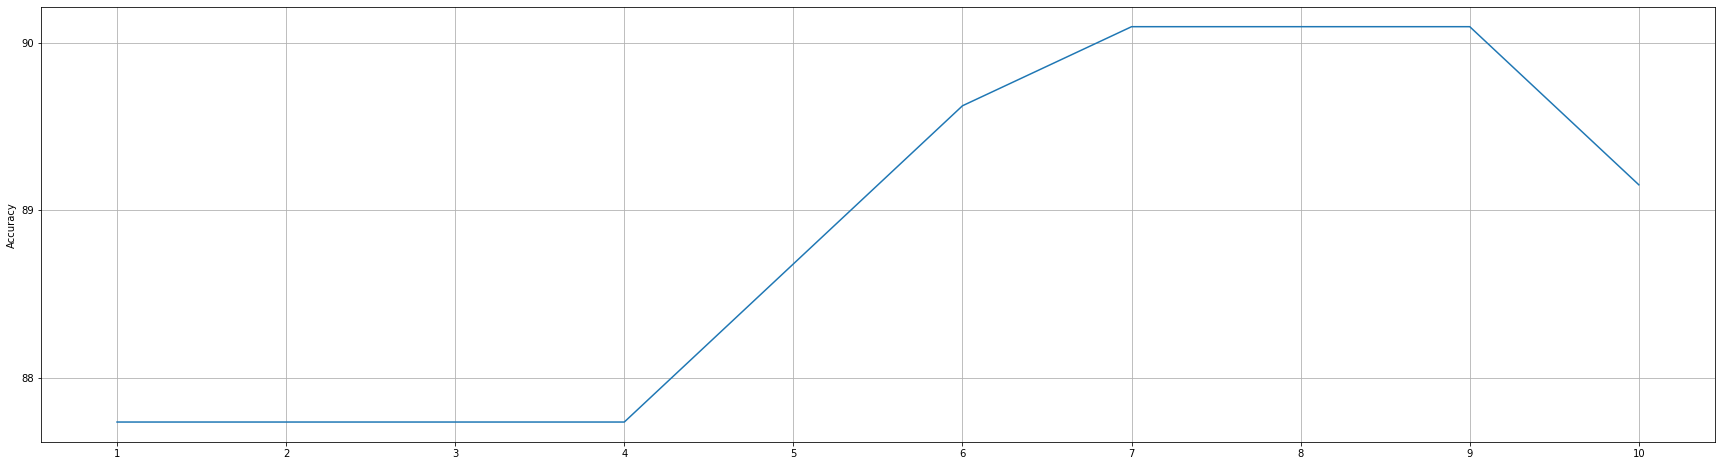

In [243]:
scores=[]
X=df1
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df1 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 7
degree= 8
degree= 9
Polynomial  90.09433962264151

 df2 : [[184   2]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.71      0.19      0.30        26

    accuracy                           0.89       212
   macro avg       0.81      0.59      0.62       212
weighted avg       0.88      0.89      0.86       212



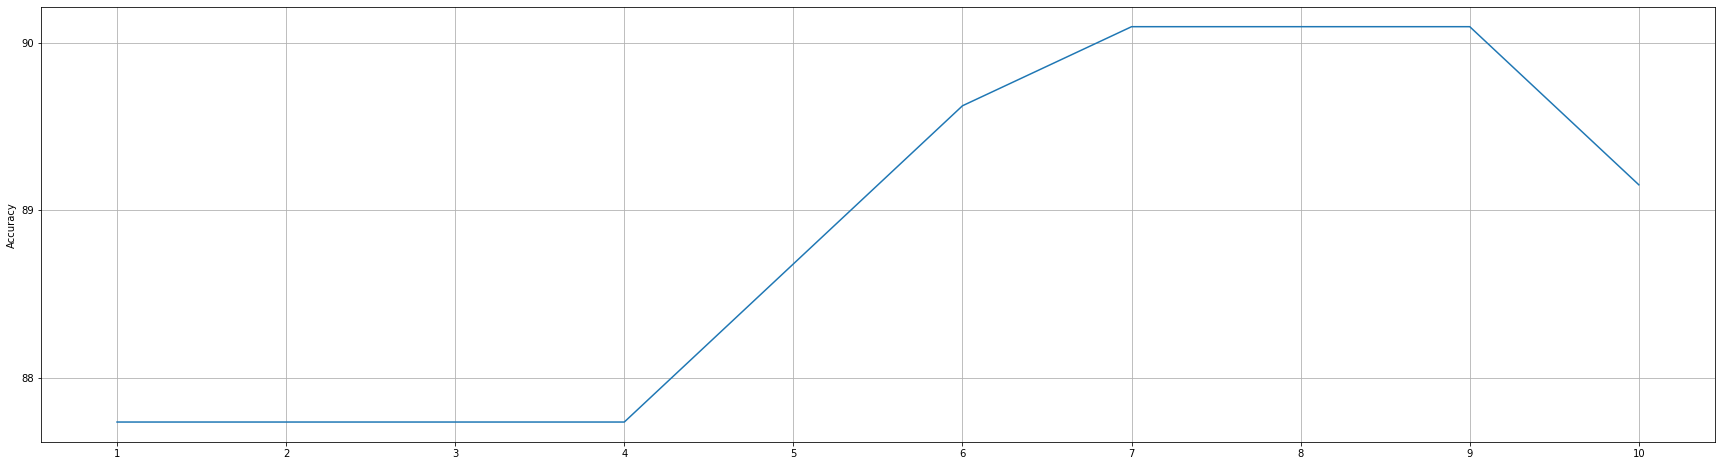

In [244]:
scores=[]
X=df2
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df2 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 7
degree= 8
Polynomial  90.09433962264151

 df3 : [[184   2]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.71      0.19      0.30        26

    accuracy                           0.89       212
   macro avg       0.81      0.59      0.62       212
weighted avg       0.88      0.89      0.86       212



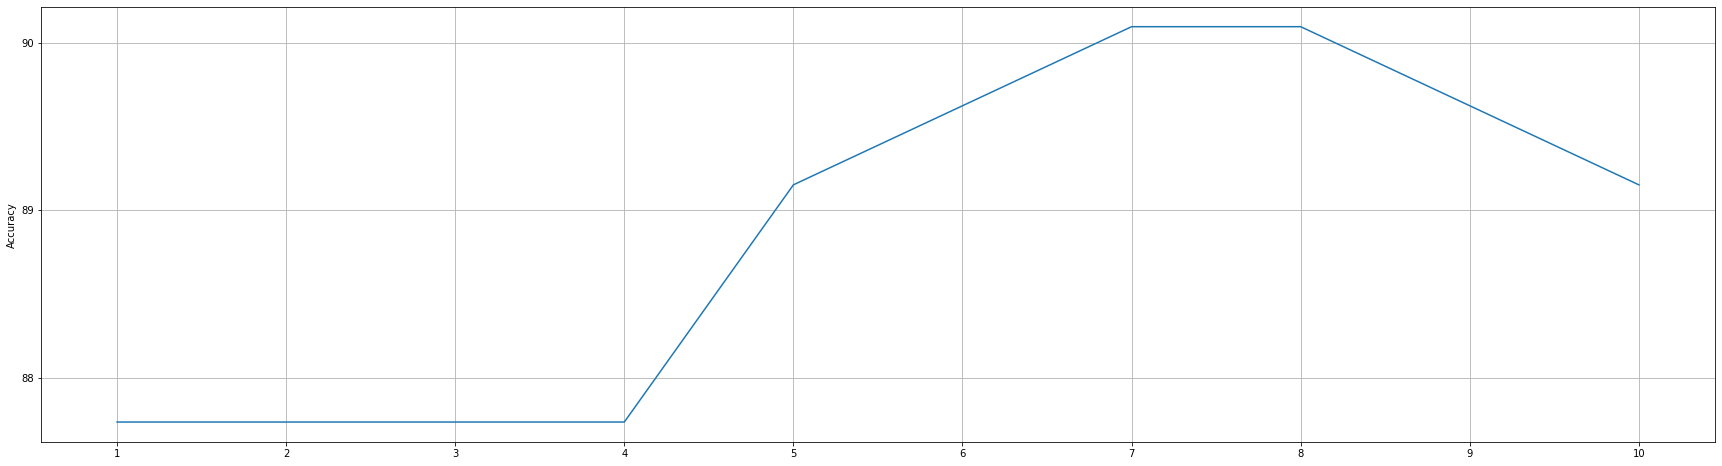

In [245]:
scores=[]
X=df3
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df3 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

91.0377358490566
degree= 8
Polynomial  91.0377358490566

 df4 : [[185   1]
 [ 20   6]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       186
           1       0.86      0.23      0.36        26

    accuracy                           0.90       212
   macro avg       0.88      0.61      0.65       212
weighted avg       0.90      0.90      0.87       212



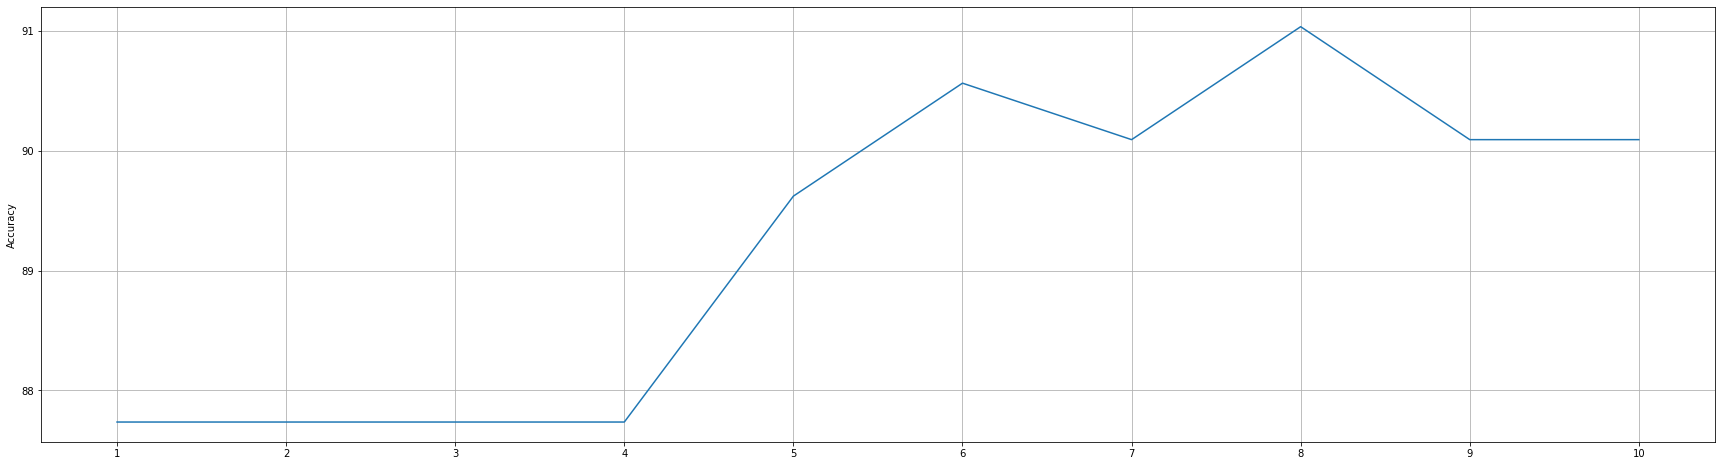

In [246]:
scores=[]
X=df4
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df4 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.56603773584906
degree= 6
Polynomial  90.56603773584906

 df5 : [[184   2]
 [ 20   6]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.75      0.23      0.35        26

    accuracy                           0.90       212
   macro avg       0.83      0.61      0.65       212
weighted avg       0.88      0.90      0.87       212



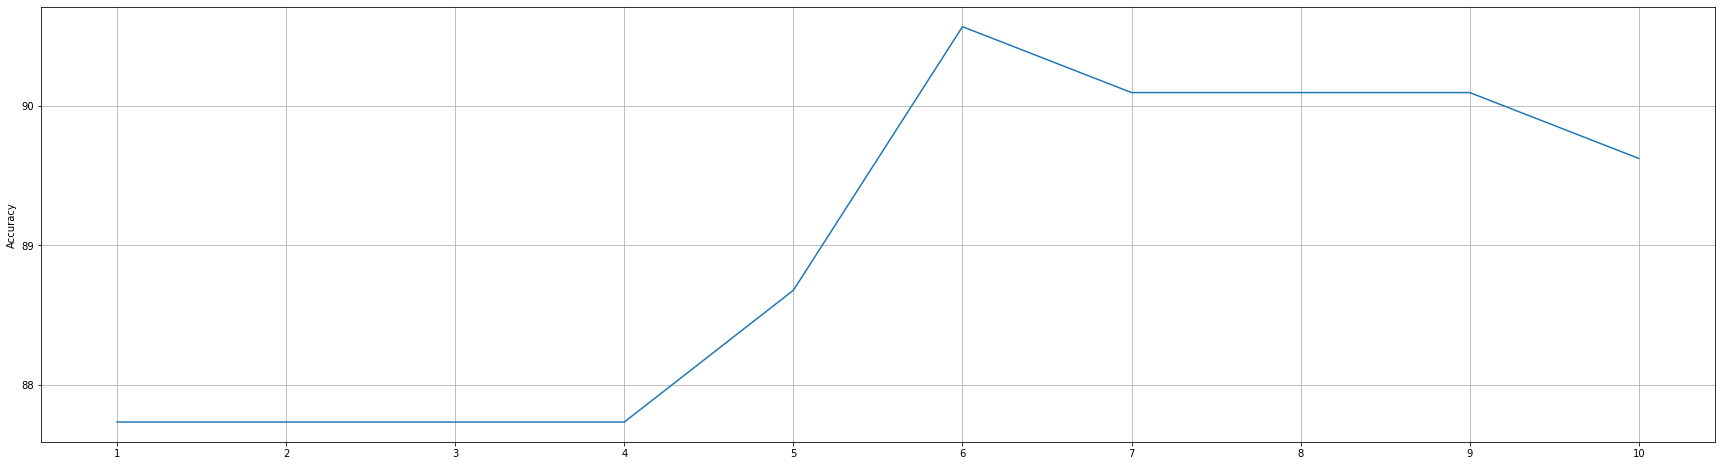

In [247]:
scores=[]
X=df5
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df5 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.56603773584906
degree= 6
degree= 7
Polynomial  90.56603773584906

 df6 : [[184   2]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.71      0.19      0.30        26

    accuracy                           0.89       212
   macro avg       0.81      0.59      0.62       212
weighted avg       0.88      0.89      0.86       212



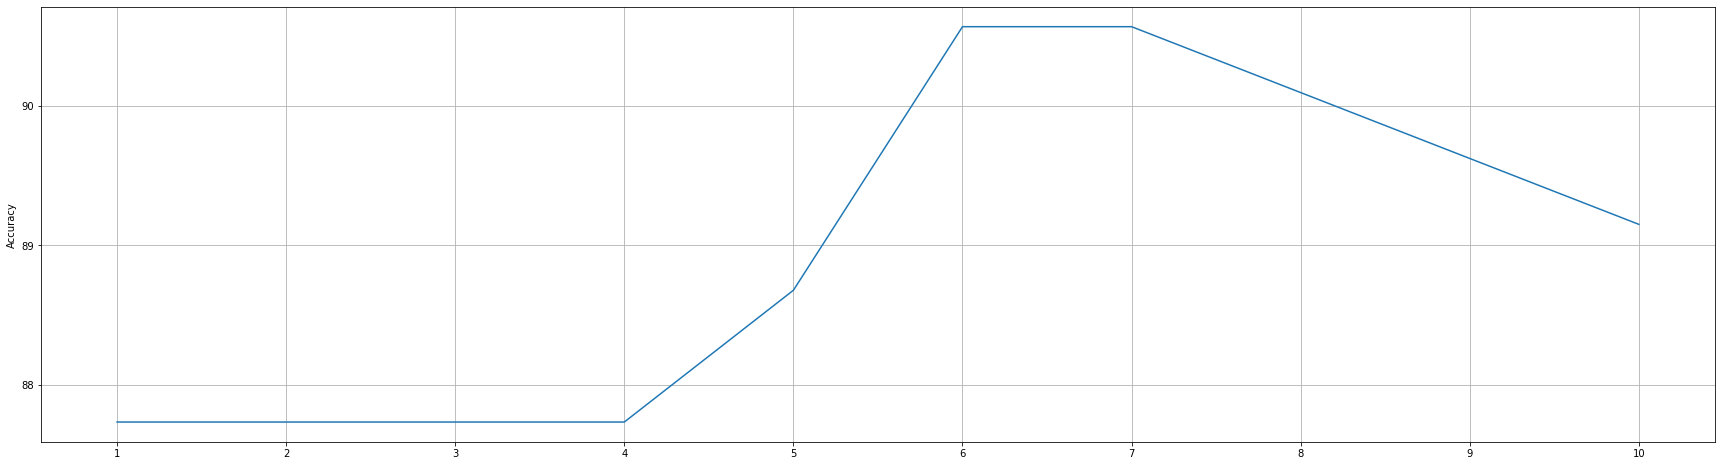

In [248]:
scores=[]
X=df6
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df6 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 7
degree= 10
Polynomial  90.09433962264151

 df7 : [[185   1]
 [ 20   6]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       186
           1       0.86      0.23      0.36        26

    accuracy                           0.90       212
   macro avg       0.88      0.61      0.65       212
weighted avg       0.90      0.90      0.87       212



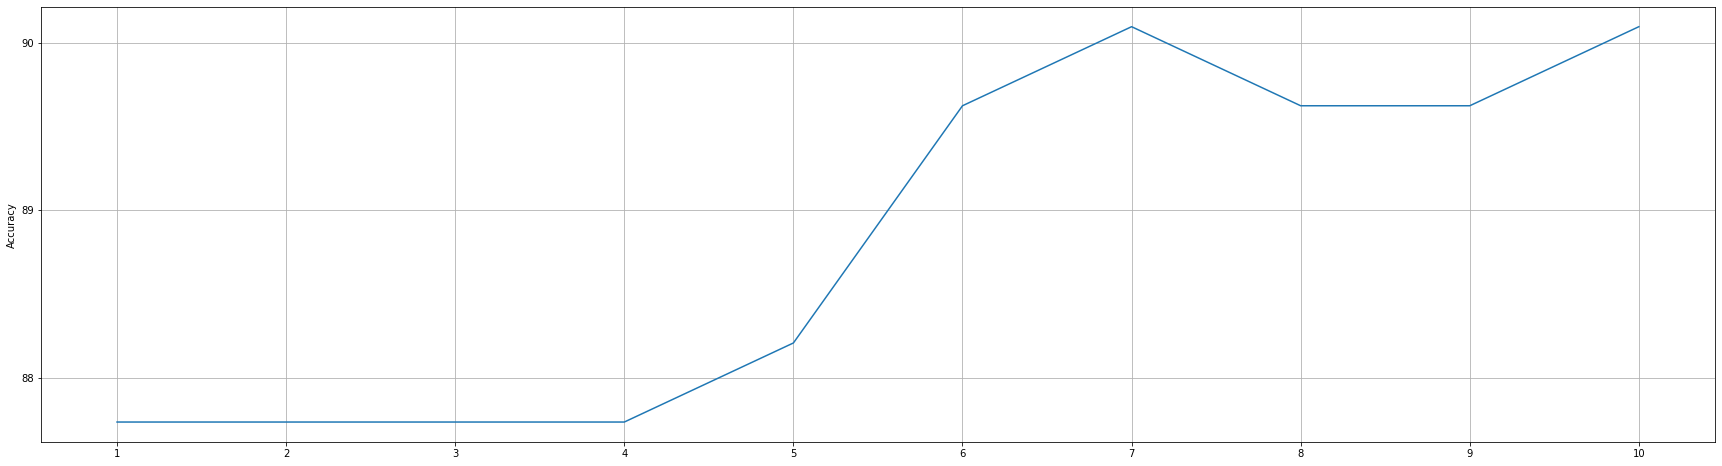

In [249]:
scores=[]
X=df7
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df7 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 8
degree= 9
degree= 10
Polynomial  90.09433962264151

 df8 : [[184   2]
 [ 19   7]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       186
           1       0.78      0.27      0.40        26

    accuracy                           0.90       212
   macro avg       0.84      0.63      0.67       212
weighted avg       0.89      0.90      0.88       212



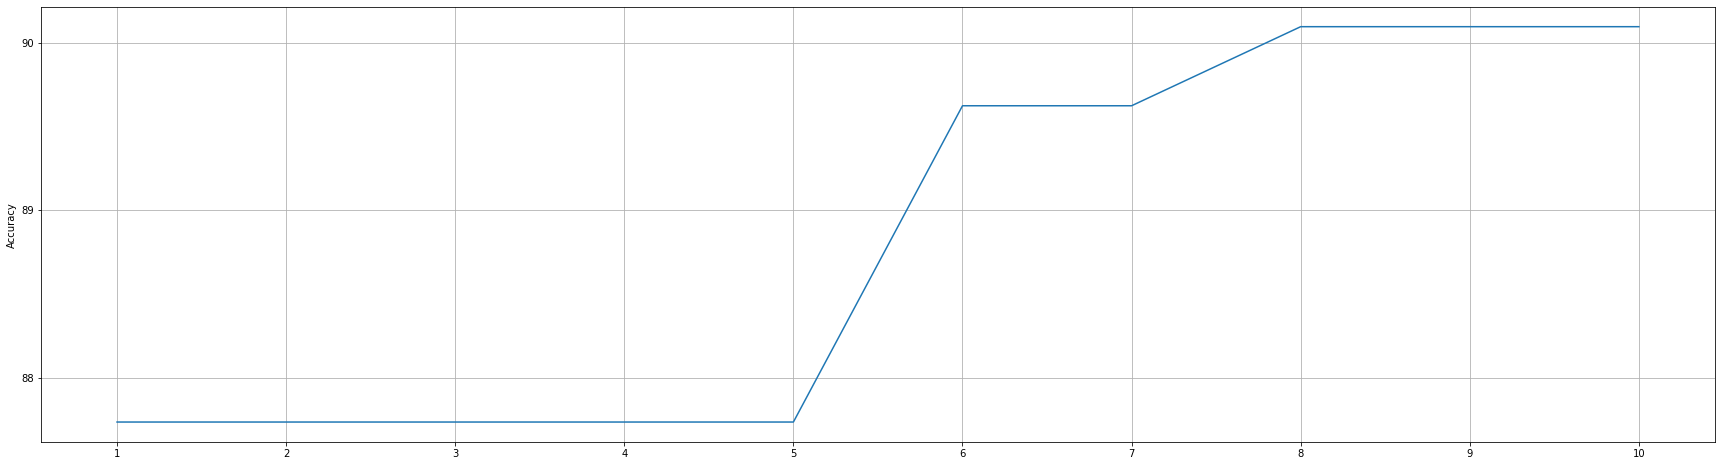

In [250]:
scores=[]
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df8 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 7
degree= 8
degree= 10
Polynomial  90.09433962264151

 df9 : [[184   2]
 [ 19   7]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       186
           1       0.78      0.27      0.40        26

    accuracy                           0.90       212
   macro avg       0.84      0.63      0.67       212
weighted avg       0.89      0.90      0.88       212



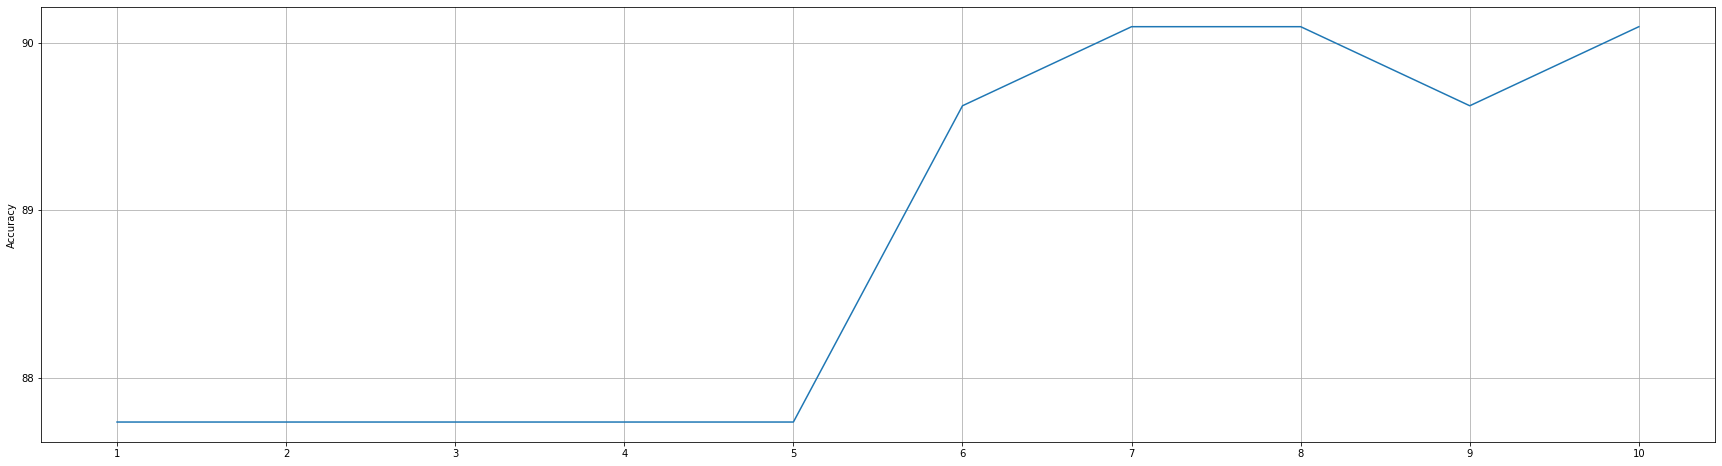

In [251]:
scores=[]
X=df9
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df9 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 7
degree= 10
Polynomial  90.09433962264151

 df10 : [[184   2]
 [ 19   7]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       186
           1       0.78      0.27      0.40        26

    accuracy                           0.90       212
   macro avg       0.84      0.63      0.67       212
weighted avg       0.89      0.90      0.88       212



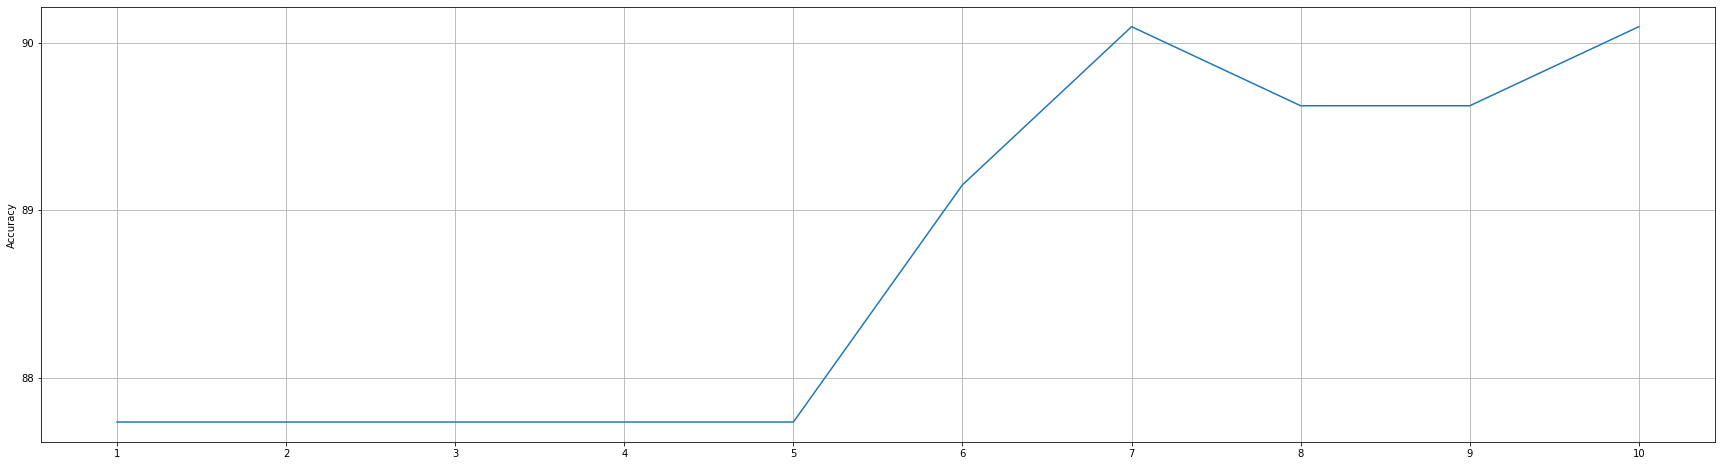

In [252]:
scores=[]
X=df10
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df10 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

89.62264150943396
degree= 8
degree= 9
degree= 10
Polynomial  89.62264150943396

 df11 : [[184   2]
 [ 20   6]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.75      0.23      0.35        26

    accuracy                           0.90       212
   macro avg       0.83      0.61      0.65       212
weighted avg       0.88      0.90      0.87       212



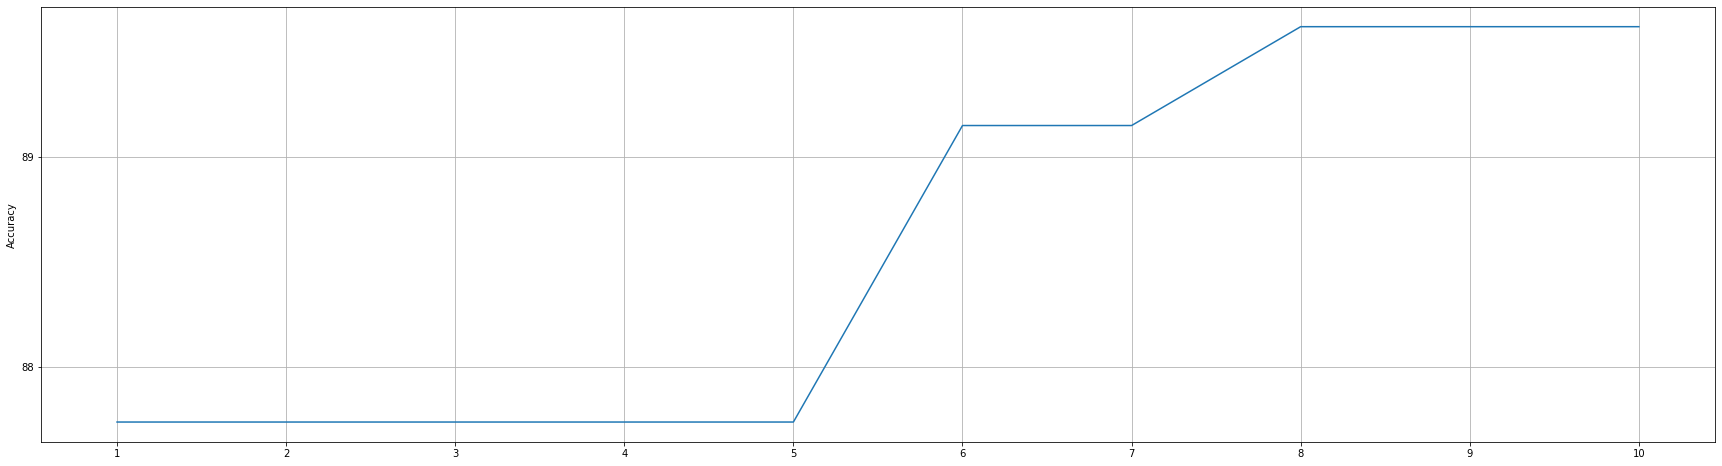

In [253]:
scores=[]
X=df11
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df11 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

89.62264150943396
degree= 7
degree= 10
Polynomial  89.62264150943396

 df13 : [[183   3]
 [ 19   7]] 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       186
           1       0.70      0.27      0.39        26

    accuracy                           0.90       212
   macro avg       0.80      0.63      0.67       212
weighted avg       0.88      0.90      0.88       212



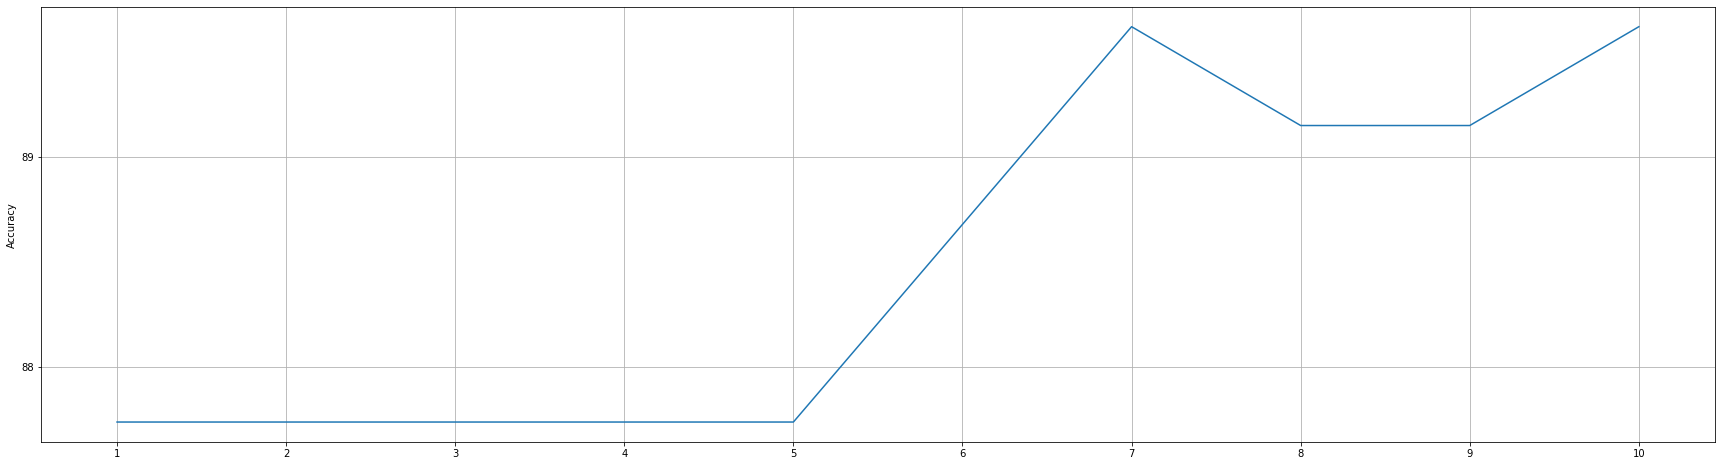

In [254]:
scores=[]
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df13 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

89.62264150943396
degree= 7
Polynomial  89.62264150943396

 df14 : [[183   3]
 [ 22   4]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       186
           1       0.57      0.15      0.24        26

    accuracy                           0.88       212
   macro avg       0.73      0.57      0.59       212
weighted avg       0.85      0.88      0.85       212



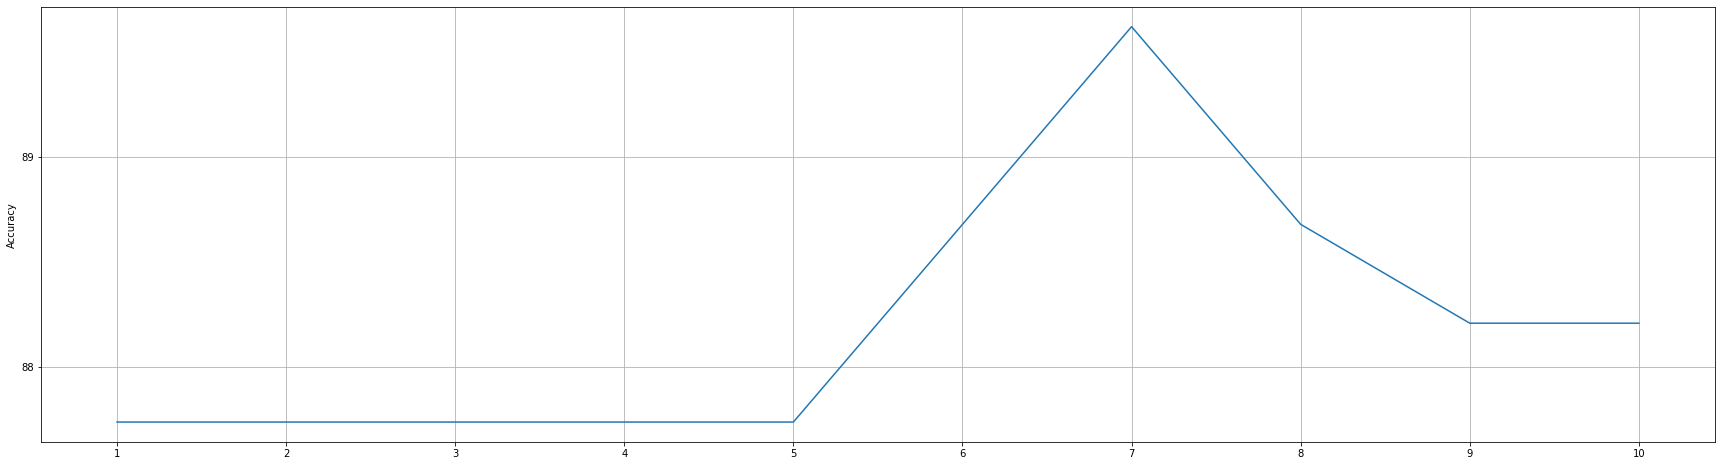

In [255]:
scores=[]
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df14 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

89.15094339622641
degree= 7
Polynomial  89.15094339622641

 df15 : [[183   3]
 [ 22   4]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       186
           1       0.57      0.15      0.24        26

    accuracy                           0.88       212
   macro avg       0.73      0.57      0.59       212
weighted avg       0.85      0.88      0.85       212



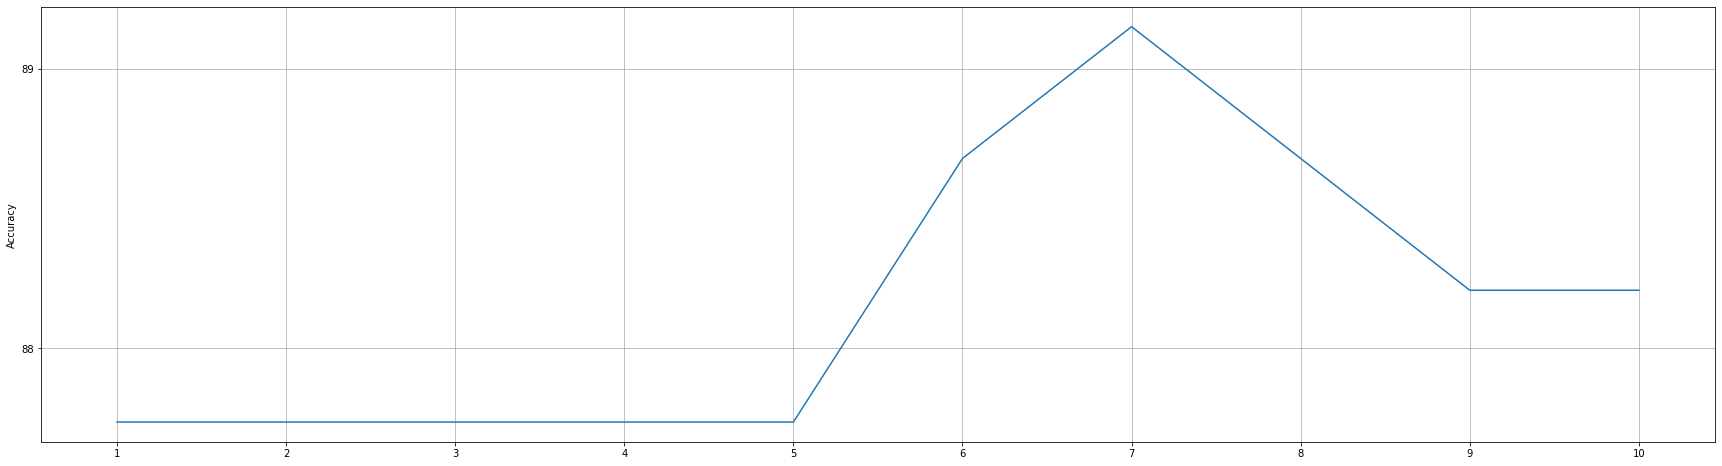

In [256]:
scores=[]
X=df15
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df15 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

89.62264150943396
degree= 6
degree= 7
degree= 8
degree= 10
Polynomial  89.62264150943396

 df16 : [[184   2]
 [ 20   6]] 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       186
           1       0.75      0.23      0.35        26

    accuracy                           0.90       212
   macro avg       0.83      0.61      0.65       212
weighted avg       0.88      0.90      0.87       212



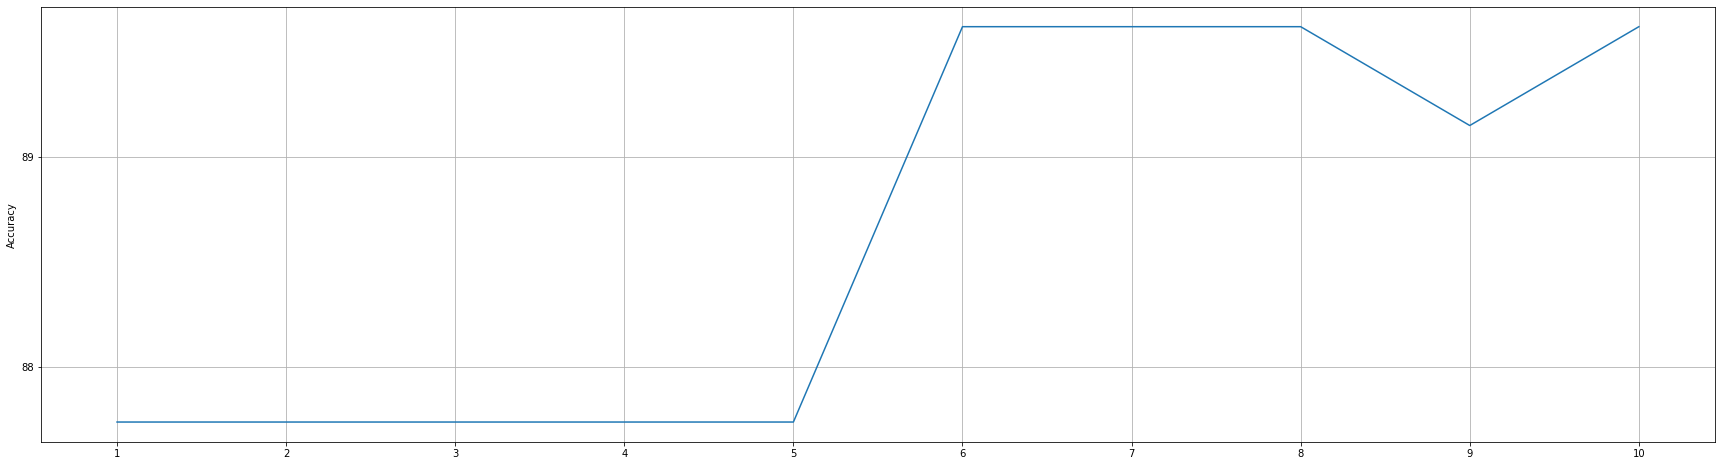

In [257]:
scores=[]
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df16 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 5
Polynomial  90.09433962264151

 df17 : [[182   4]
 [ 20   6]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       186
           1       0.60      0.23      0.33        26

    accuracy                           0.89       212
   macro avg       0.75      0.60      0.64       212
weighted avg       0.86      0.89      0.86       212



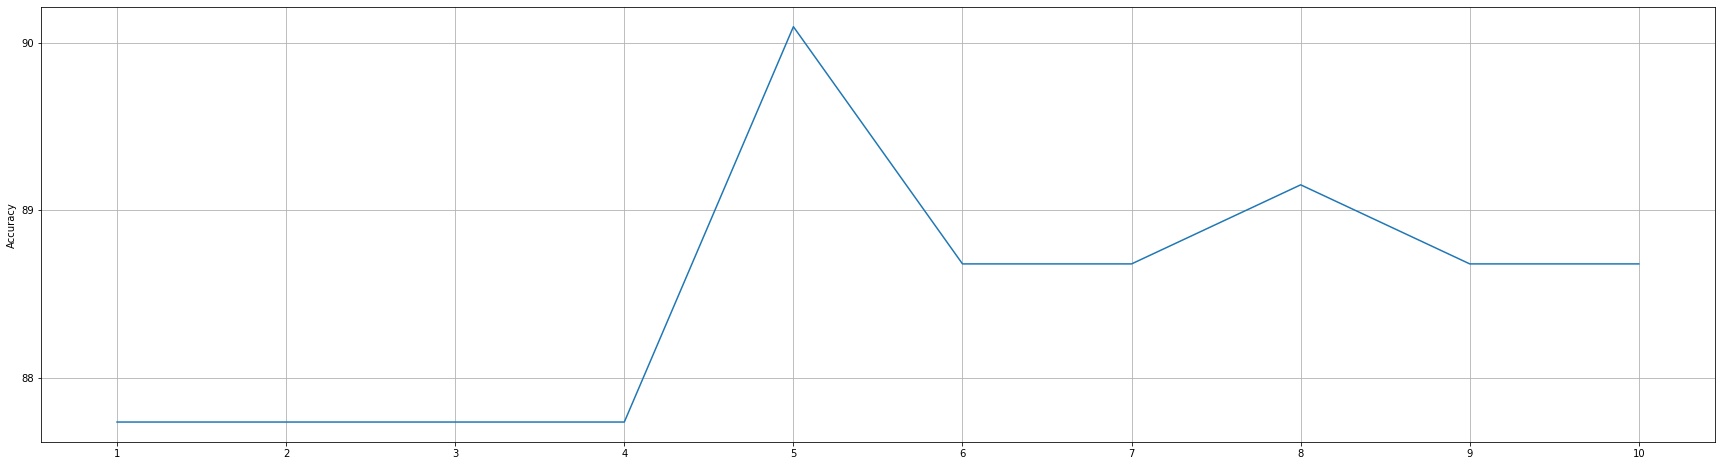

In [258]:
scores=[]
X=df17
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df17 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 5
degree= 7
Polynomial  90.09433962264151

 df18 : [[175  11]
 [ 19   7]] 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       186
           1       0.39      0.27      0.32        26

    accuracy                           0.86       212
   macro avg       0.65      0.61      0.62       212
weighted avg       0.84      0.86      0.85       212



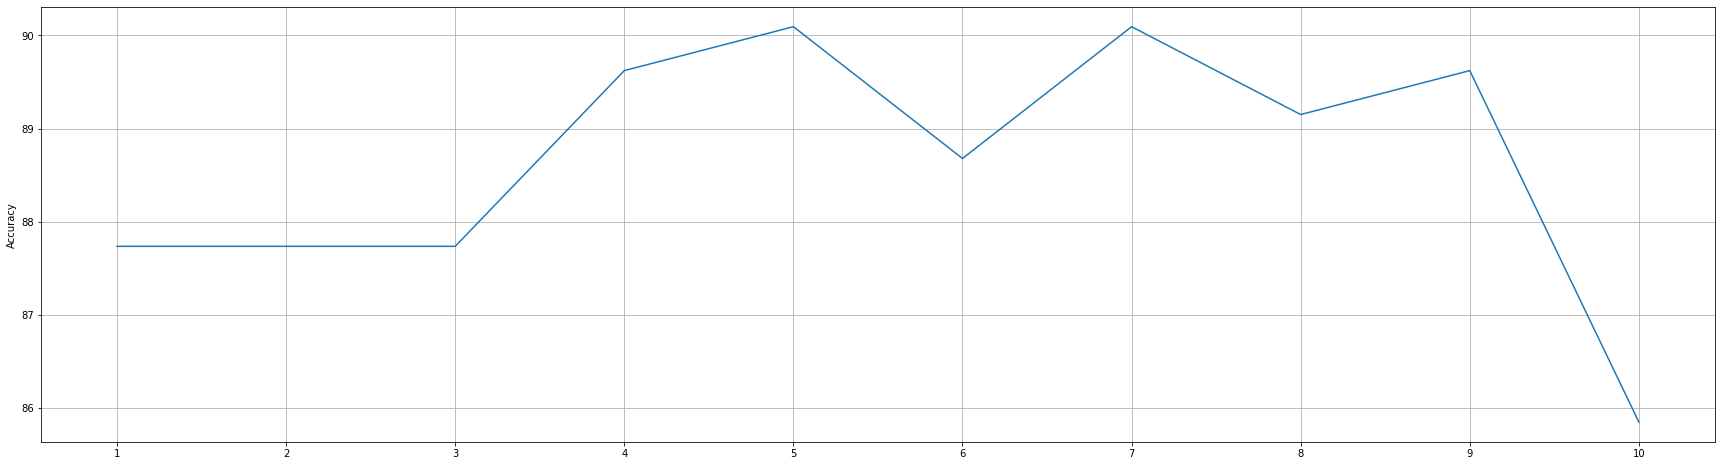

In [259]:
scores=[]
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df18 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

87.73584905660378
degree= 1
degree= 2
degree= 3
degree= 4
degree= 5
degree= 6
Polynomial  87.73584905660378

 df19 : [[180   6]
 [ 26   0]] 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       186
           1       0.00      0.00      0.00        26

    accuracy                           0.85       212
   macro avg       0.44      0.48      0.46       212
weighted avg       0.77      0.85      0.81       212



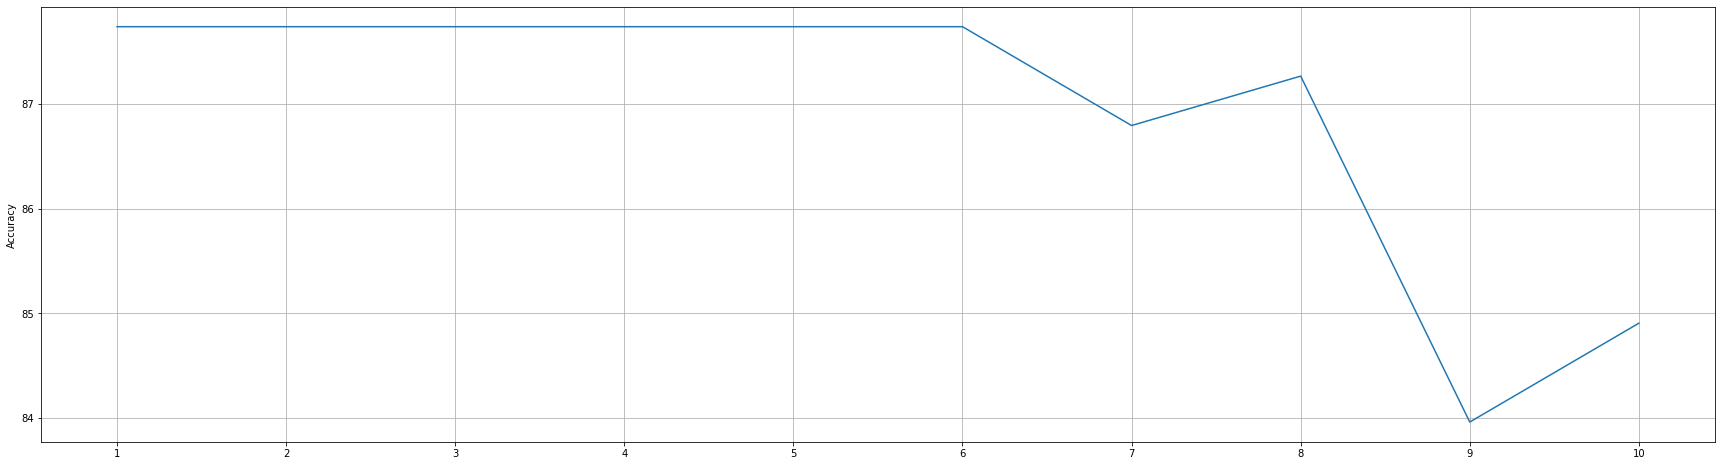

In [260]:
scores=[]
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df19 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

87.73584905660378
degree= 1
degree= 2
degree= 3
degree= 4
degree= 5
degree= 6
degree= 7
degree= 8
degree= 9
degree= 10
Polynomial  87.73584905660378

 df20 : [[186   0]
 [ 26   0]] 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       186
           1       0.00      0.00      0.00        26

    accuracy                           0.88       212
   macro avg       0.44      0.50      0.47       212
weighted avg       0.77      0.88      0.82       212



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


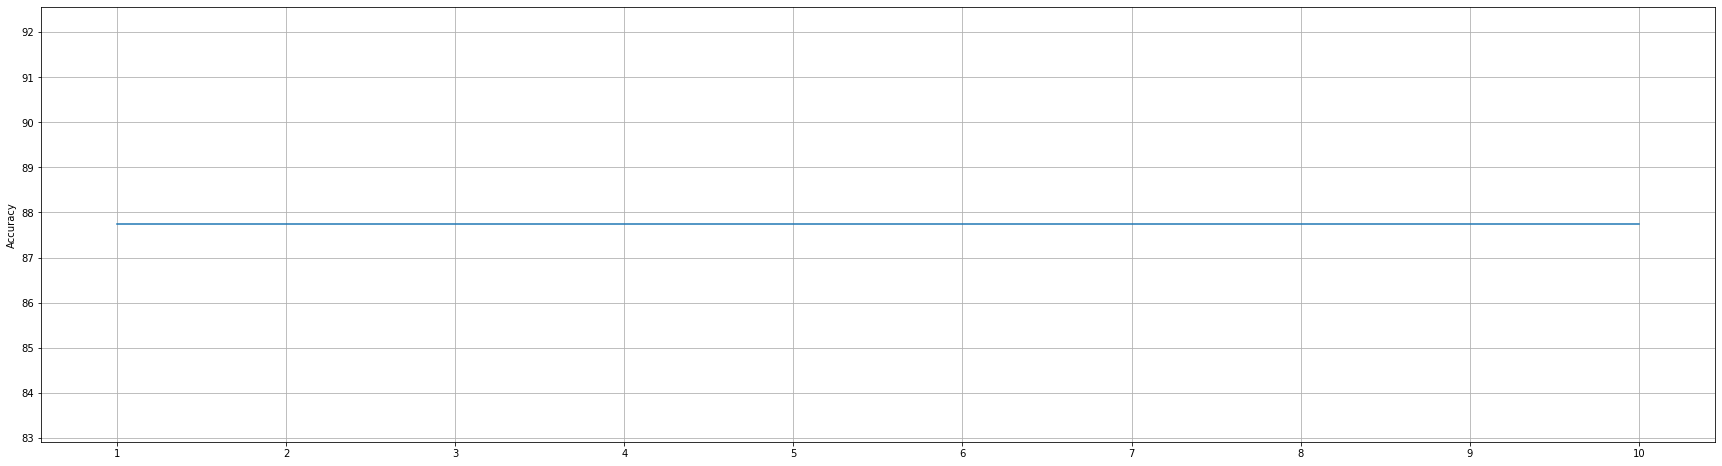

In [261]:
scores=[]
X=df20
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df20 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 3
degree= 4
Polynomial  90.09433962264151

 df21 : [[183   3]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       186
           1       0.62      0.19      0.29        26

    accuracy                           0.89       212
   macro avg       0.76      0.59      0.62       212
weighted avg       0.86      0.89      0.86       212



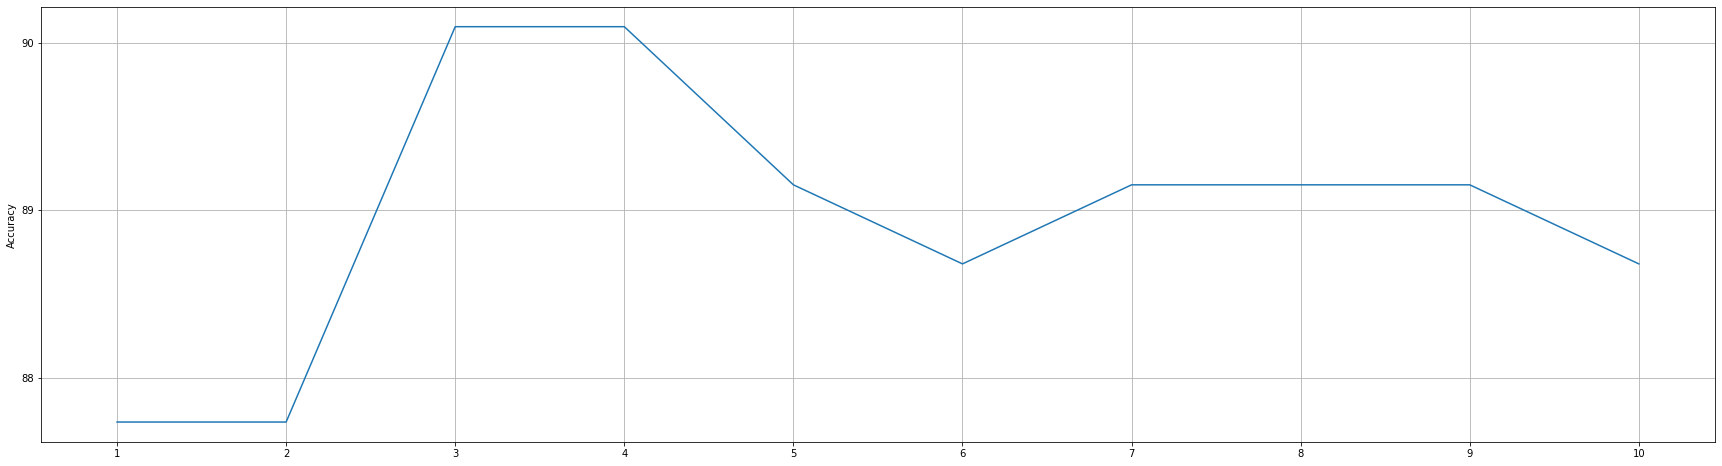

In [262]:
scores=[]
X=df21
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df21 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

90.09433962264151
degree= 3
degree= 4
Polynomial  90.09433962264151

 df12 : [[183   3]
 [ 21   5]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       186
           1       0.62      0.19      0.29        26

    accuracy                           0.89       212
   macro avg       0.76      0.59      0.62       212
weighted avg       0.86      0.89      0.86       212



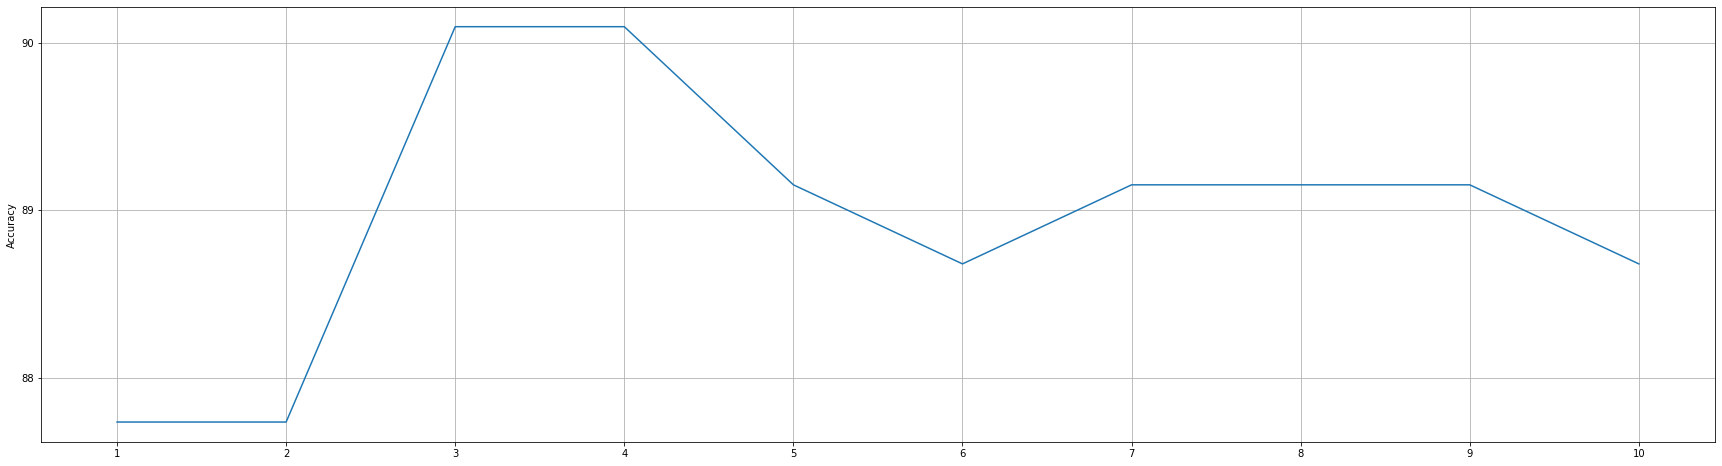

In [263]:
scores=[]
X=ak
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    poly_1 = poly.predict(X_test)
    a.append((accuracy_score(y_test, poly_1))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df12 :',confusion_matrix(y_test, poly_1),'\n',(classification_report(y_test, poly_1)))

# KNN orginal

In [264]:
X=ak
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
X_train
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_1=knn.predict(X_test)
print('\norignal :',(accuracy_score(y_test,y_pred_1))*100,'\n',confusion_matrix(y_test,y_pred_1),'\n',(classification_report(y_test,y_pred_1)))


orignal : 91.48936170212765 
 [[128   0]
 [ 12   1]] 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       128
           1       1.00      0.08      0.14        13

    accuracy                           0.91       141
   macro avg       0.96      0.54      0.55       141
weighted avg       0.92      0.91      0.88       141



# LR

In [265]:
X=ak
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_2 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_2)
print('\ndf1: ',accuracy*100,'\n',confusion_matrix(y_test,y_pred_2),'\n',(classification_report(y_test,y_pred_2)))


df1:  82.97872340425532 
 [[115  10]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       125
           1       0.17      0.12      0.14        16

    accuracy                           0.83       141
   macro avg       0.53      0.52      0.52       141
weighted avg       0.81      0.83      0.82       141



# NB

In [266]:
X=ak
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k)
nb= GaussianNB()
nb.fit(X_train,y_train)
# Make predictions on the test data
y_pred_3 = nb.predict(X_test)
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred_3)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,y_pred_3),'\n',(classification_report(y_test,y_pred_3)))



df1: 48.226950354609926 
 [[59 66]
 [ 7  9]] 
               precision    recall  f1-score   support

           0       0.89      0.47      0.62       125
           1       0.12      0.56      0.20        16

    accuracy                           0.48       141
   macro avg       0.51      0.52      0.41       141
weighted avg       0.81      0.48      0.57       141



# DT

In [267]:
X=ak
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion = "gini",random_state=40)
clf.fit(X_train,y_train)
y_pred_4 = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_4)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,y_pred_4),'\n',(classification_report(y_test,y_pred_4)))



df1: 78.72340425531915 
 [[105  14]
 [ 16   6]] 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       119
           1       0.30      0.27      0.29        22

    accuracy                           0.79       141
   macro avg       0.58      0.58      0.58       141
weighted avg       0.78      0.79      0.78       141



# RF

In [268]:
X=ak
y=df['vital.status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(X_train,y_train)
y_pred_5 = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_5)
print('\ndf1:',accuracy*100,'\n',confusion_matrix(y_test,y_pred_5),'\n',(classification_report(y_test,y_pred_5)))



df1: 90.0709219858156 
 [[124   1]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       125
           1       0.75      0.19      0.30        16

    accuracy                           0.90       141
   macro avg       0.83      0.59      0.62       141
weighted avg       0.89      0.90      0.87       141



# Adaboost

In [269]:
X = ak
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost_clf = AdaBoostClassifier(n_estimators=40, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred_6 = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_6)
print(f"df1: {accuracy*100:.2f}",'\n',confusion_matrix(y_test,y_pred_6),'\n',(classification_report(y_test,y_pred_6)))


df1: 85.82 
 [[119   6]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       125
           1       0.25      0.12      0.17        16

    accuracy                           0.86       141
   macro avg       0.57      0.54      0.54       141
weighted avg       0.82      0.86      0.84       141



# XGBboost

In [270]:
X =ak
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'max_depth': 3,'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_round = 100  
bst = xgb.train(params, dtrain, num_round)
predictions = bst.predict(dtest)
y_pred_7 = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(y_test, y_pred_7)
print(f"df20 : {accuracy*100:.2f}",'\n',confusion_matrix(y_test, y_pred_7),'\n',(classification_report(y_test, y_pred_7)))


df20 : 87.23 
 [[122   3]
 [ 15   1]] 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       125
           1       0.25      0.06      0.10        16

    accuracy                           0.87       141
   macro avg       0.57      0.52      0.52       141
weighted avg       0.82      0.87      0.84       141



# SVM-linear

In [271]:
X=ak
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear= SVC(kernel='linear')
linear.fit(X_train, y_train)
y_pred_8= linear.predict(X_test)
linear_2 = accuracy_score(y_test,y_pred_8)
print(" df20 linear:",linear_2*100,'\n',confusion_matrix(y_test,y_pred_8),'\n',(classification_report(y_test, y_pred_8)))


 df20 linear: 82.26950354609929 
 [[113  12]
 [ 13   3]] 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       125
           1       0.20      0.19      0.19        16

    accuracy                           0.82       141
   macro avg       0.55      0.55      0.55       141
weighted avg       0.82      0.82      0.82       141



# SVM-Rbf

In [272]:
X=ak
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf= SVC(kernel='rbf')
rbf.fit(X_train, y_train)
y_pred_9= rbf.predict(X_test)
rbf_2 = accuracy_score(y_test,y_pred_9)
print(" df20 RBF:",rbf_2*100,'\n',confusion_matrix(y_test,y_pred_9),'\n',(classification_report(y_test, y_pred_9)))


 df20 RBF: 88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM-Sigmoid

In [273]:
X=ak
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
y_pred_10 = sigmoid.predict(X_test)
sigmoid_2 = accuracy_score(y_test, sigmoid_1)
print(" df1 Sigmoid: ", sigmoid_2*100,'\n',confusion_matrix(y_test,sigmoid_1),'\n',(classification_report(y_test,sigmoid_1)))

C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 df1 Sigmoid:  88.65248226950354 
 [[125   0]
 [ 16   0]] 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       0.00      0.00      0.00        16

    accuracy                           0.89       141
   macro avg       0.44      0.50      0.47       141
weighted avg       0.79      0.89      0.83       141



C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATHARVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM-poly

90.0709219858156
degree= 3
Polynomial  90.0709219858156

 df12 : [[123   2]
 [ 14   2]] 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       125
           1       0.50      0.12      0.20        16

    accuracy                           0.89       141
   macro avg       0.70      0.55      0.57       141
weighted avg       0.85      0.89      0.86       141



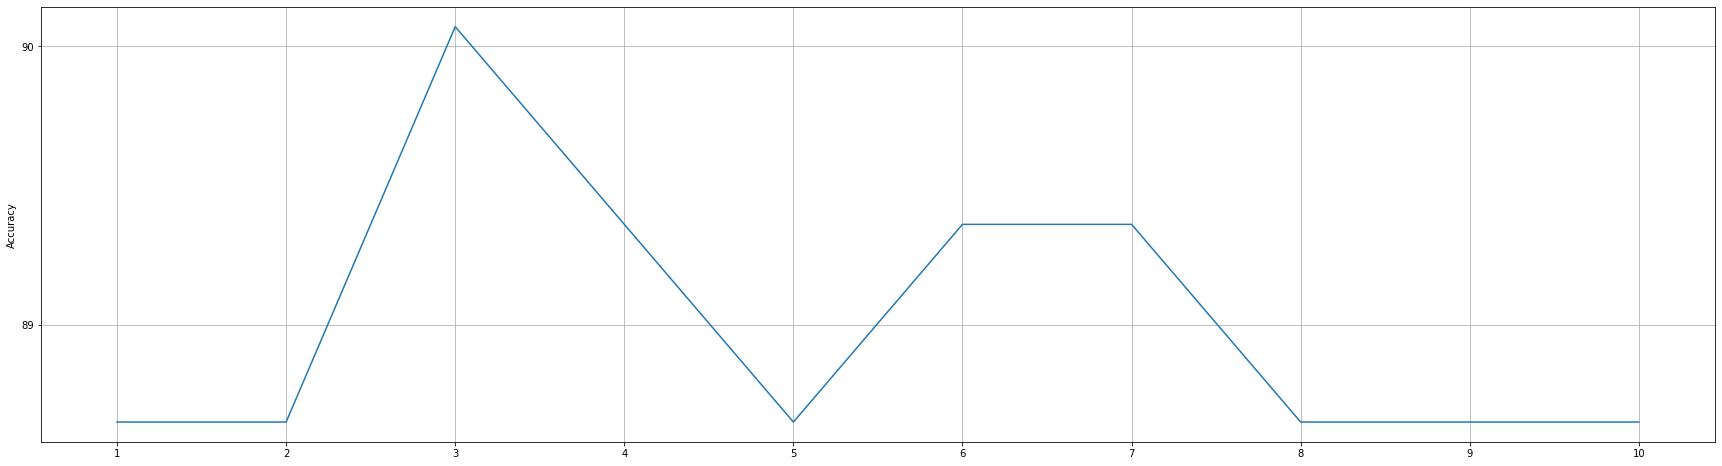

In [274]:
scores=[]
X=ak
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
a=[]
n=10
for i in range (n):
    poly = SVC(kernel='poly', degree=i+1)  
    poly.fit(X_train, y_train)
    y_pred_11 = poly.predict(X_test)
    a.append((accuracy_score(y_test, y_pred_11))*100)
d=[]
for i in range(n):
    d.append(i+1)
b=[]
for item in a :
    b.append(item + 0)
scores
c=b[0]
b.sort(reverse=True)
c=b[0]
print(c)
for i in range(n):
    if(a[i]==c):
        degree=i
        print('degree=',i+1)
a[degree]  
print("Polynomial ", a[degree])
plt.figure(figsize=(30,8))
plt.yticks(np.arange(0, 100,1)) 
plt.xticks(np.arange(0, 11,1)) 
plt.plot(d,a)
plt.ylabel('Accuracy')
plt.grid()
print('\n df12 :',confusion_matrix(y_test, y_pred_11),'\n',(classification_report(y_test, y_pred_11)))

# ROC-AUC cruve

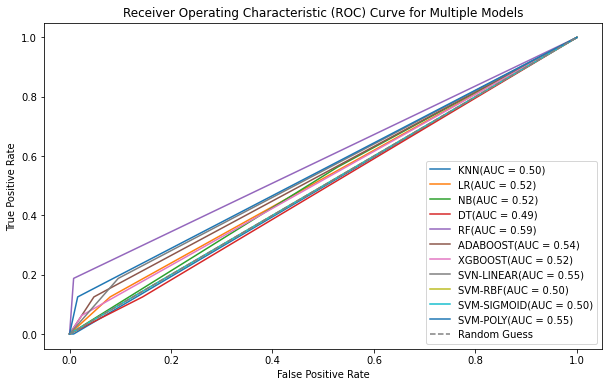

In [275]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# List of predicted probabilities for each model
y_predict_all =[y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6,y_pred_7,y_pred_8,y_pred_9,y_pred_10,y_pred_11]

# Plot ROC curves for each model
plt.figure(figsize=(10,6 ))
model_all=['KNN','LR','NB','DT','RF','ADABOOST','XGBOOST','SVN-LINEAR','SVM-RBF','SVM-SIGMOID','SVM-POLY']
for i, y_predict in enumerate(y_predict_all, 0):
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_all[i]}(AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiple Models')
plt.legend()
plt.show()


In [319]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
X=ak
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_scores = lr_model.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)
trace1 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

#knn model

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled ,y_train)
knn_scores = knn_model.predict_proba(X_test_scaled )[:,1]
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_scores)
knn_auc = roc_auc_score(y_test, knn_scores)
trace2 = go.Scatter(
    x=knn_fpr,
    y=knn_tpr,
    mode='lines',
    name=f'k nearest neighbour (Area = {knn_auc:.2f})'
)

#navie basies

nb_model= GaussianNB()
nb_model.fit(X_train,y_train)
nb_scores = nb_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_scores)
nb_auc = roc_auc_score(y_test, nb_scores)
trace3 = go.Scatter(
    x=nb_fpr,
    y=nb_tpr,
    mode='lines',
    name=f'navie basies (Area = {nb_auc:.2f})'
)

#decision tree

dt_model=DecisionTreeClassifier(criterion = "gini",random_state=40)
dt_model.fit(X_train,y_train)
dt_scores =dt_model.predict_proba(X_test)[:,1]
dt_fpr,dt_tpr, dt_thresholds = roc_curve(y_test,dt_scores)
dt_auc = roc_auc_score(y_test,dt_scores)
trace4 = go.Scatter(
    x=dt_fpr,
    y=dt_tpr,
    mode='lines',
    name=f'Decision tree (Area = {dt_auc:.2f})'
)

#random forest

rf_model=RandomForestClassifier(n_estimators=30, random_state=42)
rf_model.fit(X_train,y_train)
rf_scores =rf_model.predict_proba(X_test)[:,1]
rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_test,rf_scores)
rf_auc = roc_auc_score(y_test,rf_scores)
trace5= go.Scatter(
    x=rf_fpr,
    y=rf_tpr,
    mode='lines',
    name=f'Random forest (Area = {rf_auc:.2f})'
)


#adboost
ad_model= AdaBoostClassifier(n_estimators=40, random_state=42)
ad_model.fit(X_train, y_train)
ad_scores =ad_model.predict_proba(X_test)[:,1]
ad_fpr,ad_tpr,ad_thresholds = roc_curve(y_test,ad_scores)
ad_auc = roc_auc_score(y_test,ad_scores)
trace6= go.Scatter(
    x=ad_fpr,
    y=ad_tpr,
    mode='lines',
    name=f'AdaBoost (Area = {ad_auc:.2f})'
)

#Svm sigmoid

sigmoid_model= SVC(kernel='sigmoid',probability=True)
sigmoid_model.fit(X_train, y_train)
sigmoid_scores =sigmoid_model.predict_proba(X_test)[:,1]
sigmoid_fpr,sigmoid_tpr,sigmoid_thresholds = roc_curve(y_test,sigmoid_scores)
sigmoid_auc = roc_auc_score(y_test,sigmoid_scores)
trace7= go.Scatter(
    x=sigmoid_fpr,
    y=sigmoid_tpr,
    mode='lines',
    name=f'SVM-sigmoid (Area = {sigmoid_auc:.2f})'
)


#SVM linear

linear_model= SVC(kernel='linear',probability=True)
linear_model.fit(X_train, y_train)
linear_scores =linear_model.predict_proba(X_test)[:,1]
linear_fpr,linear_tpr,linear_thresholds = roc_curve(y_test,linear_scores)
linear_auc = roc_auc_score(y_test,linear_scores)
trace8= go.Scatter(
    x=linear_fpr,
    y=linear_tpr,
    mode='lines',
    name=f'SVM-linear (Area = {linear_auc:.2f})'
)

# SVM RBF

rbf_model= SVC(kernel='rbf',probability=True)
rbf_model.fit(X_train, y_train)
rbf_scores =rbf_model.predict_proba(X_test)[:,1]
rbf_fpr,rbf_tpr,rbf_thresholds = roc_curve(y_test,rbf_scores)
rbf_auc = roc_auc_score(y_test,rbf_scores)
trace9= go.Scatter(
    x=rbf_fpr,
    y=rbf_tpr,
    mode='lines',
    name=f'SVM-rbf (Area = {rbf_auc:.2f})'
)
# Diagonal line
trace0 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

layout = go.Layout(
    xaxis=dict(title='False Positive Rate', tickmode='linear', tick0=0, dtick=0.1),
    yaxis=dict(title='True Positive Rate', tickmode='linear', tick0=0, dtick=0.1),
    title='Receiver Operating Characteristic (ROC) Curve for SVM with Linear Kernel'
)
data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [318]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Logistic Regression model
X=df13
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_scores = lr_model.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)
trace1 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

#knn model
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled ,y_train)
knn_scores = knn_model.predict_proba(X_test_scaled )[:,1]
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_scores)
knn_auc = roc_auc_score(y_test, knn_scores)
trace2 = go.Scatter(
    x=knn_fpr,
    y=knn_tpr,
    mode='lines',
    name=f'k nearest neighbour (Area = {knn_auc:.2f})'
)

#navie basies
X=df19
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_model= GaussianNB()
nb_model.fit(X_train,y_train)
nb_scores = nb_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_scores)
nb_auc = roc_auc_score(y_test, nb_scores)
trace3 = go.Scatter(
    x=nb_fpr,
    y=nb_tpr,
    mode='lines',
    name=f'navie basies (Area = {nb_auc:.2f})'
)

#decision tree
X=df14
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model=DecisionTreeClassifier(criterion = "gini",random_state=40)
dt_model.fit(X_train,y_train)
dt_scores =dt_model.predict_proba(X_test)[:,1]
dt_fpr,dt_tpr, dt_thresholds = roc_curve(y_test,dt_scores)
dt_auc = roc_auc_score(y_test,dt_scores)
trace4 = go.Scatter(
    x=dt_fpr,
    y=dt_tpr,
    mode='lines',
    name=f'Decision tree (Area = {dt_auc:.2f})'
)

#random forest
X=df8
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model=RandomForestClassifier(n_estimators=30, random_state=42)
rf_model.fit(X_train,y_train)
rf_scores =rf_model.predict_proba(X_test)[:,1]
rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_test,rf_scores)
rf_auc = roc_auc_score(y_test,rf_scores)
trace5= go.Scatter(
    x=rf_fpr,
    y=rf_tpr,
    mode='lines',
    name=f'Random forest (Area = {rf_auc:.2f})'
)


#adboost
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ad_model= AdaBoostClassifier(n_estimators=40, random_state=42)
ad_model.fit(X_train, y_train)
ad_scores =ad_model.predict_proba(X_test)[:,1]
ad_fpr,ad_tpr,ad_thresholds = roc_curve(y_test,ad_scores)
ad_auc = roc_auc_score(y_test,ad_scores)
trace6= go.Scatter(
    x=ad_fpr,
    y=ad_tpr,
    mode='lines',
    name=f'AdaBoost (Area = {ad_auc:.2f})'
)

#Svm sigmoid
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sigmoid_model= SVC(kernel='sigmoid',probability=True)
sigmoid_model.fit(X_train, y_train)
sigmoid_scores =sigmoid_model.predict_proba(X_test)[:,1]
sigmoid_fpr,sigmoid_tpr,sigmoid_thresholds = roc_curve(y_test,sigmoid_scores)
sigmoid_auc = roc_auc_score(y_test,sigmoid_scores)
trace7= go.Scatter(
    x=sigmoid_fpr,
    y=sigmoid_tpr,
    mode='lines',
    name=f'SVM-sigmoid (Area = {sigmoid_auc:.2f})'
)


#SVM linear
X=df16
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model= SVC(kernel='linear',probability=True)
linear_model.fit(X_train, y_train)
linear_scores =linear_model.predict_proba(X_test)[:,1]
linear_fpr,linear_tpr,linear_thresholds = roc_curve(y_test,linear_scores)
linear_auc = roc_auc_score(y_test,linear_scores)
trace8= go.Scatter(
    x=linear_fpr,
    y=linear_tpr,
    mode='lines',
    name=f'SVM-linear (Area = {linear_auc:.2f})'
)

# SVM RBF
X=df18
y=df['vital.status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf_model= SVC(kernel='rbf',probability=True)
rbf_model.fit(X_train, y_train)
rbf_scores =rbf_model.predict_proba(X_test)[:,1]
rbf_fpr,rbf_tpr,rbf_thresholds = roc_curve(y_test,rbf_scores)
rbf_auc = roc_auc_score(y_test,rbf_scores)
trace9= go.Scatter(
    x=rbf_fpr,
    y=rbf_tpr,
    mode='lines',
    name=f'SVM-rbf (Area = {rbf_auc:.2f})'
)
# Diagonal line
trace0 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)
layout = go.Layout(
    xaxis=dict(title='False Positive Rate', tickmode='linear', tick0=0, dtick=0.1),
    yaxis=dict(title='True Positive Rate', tickmode='linear', tick0=0, dtick=0.1),
    title='Receiver Operating Characteristic (ROC) Curve for SVM with Linear Kernel'
)
data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


,algorithm,Without PCA,withPCA
0,KNN,91.49,90.78
1,LR,82.98,89.36
2,NB,48.23,89.36
3,DT,78.72,83.69
4,RF,90.07,90.07
5,Aadboost,85.82,87.94
6,Xgboost,87.23,90.07
7,SVM-linear,82.27,88.65
8,SVM-sigmoid,88.65,88.65
9,SVM-RBF,88.65,90.07


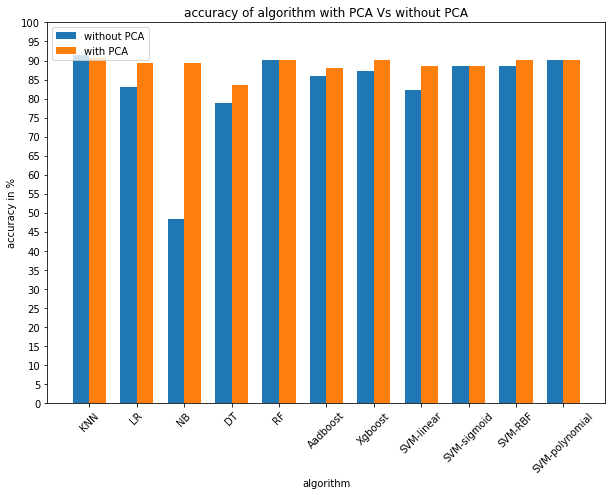

In [314]:
import matplotlib.pyplot as plt
import numpy as np
au=pd.read_excel('result.xlsx')
plt.figure(figsize=(10,7 ))
# Sample data
categories = au['algorithm']
parameter1_values = au['Without PCA']
parameter2_values = au['withPCA']

# Set up positions for the bar groups
bar_width = 0.35
index = np.arange(len(categories))

# Plotting the bars for Parameter 1
plt.bar(index, parameter1_values, width=bar_width, label='without PCA')

# Plotting the bars for Parameter 2 next to Parameter 1
plt.bar(index + bar_width, parameter2_values, width=bar_width, label='with PCA')

# Adding labels and title

plt.xlabel('algorithm')
plt.ylabel('accuracy in %')
plt.title('accuracy of algorithm with PCA Vs without PCA')
plt.yticks(np.arange(0, 105, 5))

plt.xticks(index + bar_width / 2, categories)  # Setting x-axis ticks at the center of each group
plt.legend()
plt.xticks(rotation=45)
plt.show()
# Display the plot
plt.show()


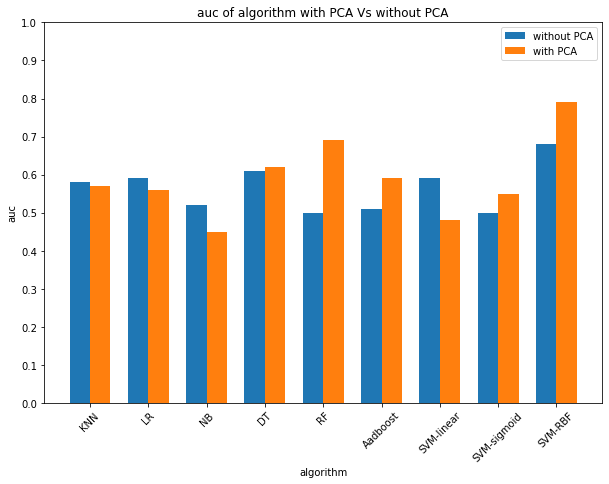

In [317]:
av=pd.read_excel('result_1.xlsx')
plt.figure(figsize=(10,7 ))
# Sample data
categories = av['algorithm']
parameter1_values = av['Without PCA']
parameter2_values = av['withPCA']

# Set up positions for the bar groups
bar_width = 0.35
index = np.arange(len(categories))

# Plotting the bars for Parameter 1
plt.bar(index, parameter1_values, width=bar_width, label='without PCA')

# Plotting the bars for Parameter 2 next to Parameter 1
plt.bar(index + bar_width, parameter2_values, width=bar_width, label='with PCA')

# Adding labels and title

plt.xlabel('algorithm')
plt.ylabel('auc')
plt.title('auc of algorithm with PCA Vs without PCA')
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xticks(index + bar_width / 2, categories)  # Setting x-axis ticks at the center of each group
plt.legend()
plt.xticks(rotation=45)
plt.show()
# Display the plot
plt.show()
